# post-process model outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
import os, re, glob
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta
from calendar import isleap

In [4]:
# import sys
# sys.path.append("/global/project/projectdirs/m1800/pin/github")
# import myfunctions.ATSutils as utils
from modvis import ATSutils
from modvis import utils
import modvis.general_plots as gp
import modvis.colors as mcolors

In [5]:
imodel = "transient_cal"
# icase = "res250m_tck1.0m_k1.0md"
icase = "res150m_tck0.5m_k1.0md"


work_dir = f"/global/project/projectdirs/m1800/pin/github/ARW/"
model_dir = f"/global/cscratch1/sd/pshuai/ARW/model/runs/{imodel}-{icase}/"
# work_dir_new = model_dir + "ensemble_run-300m-c128/base_xml/"
# rst_dir = model_dir + "model_250m-c64/transient-rs150m-gauss3-2014-rst/"
# rst_dir = [model_dir + f"{imodel}/forward_qonly-1997_2020-rst/"]
# rst_dir = [model_dir + f"{imodel}/transient-1980-rst1/", model_dir + f"{imodel}/transient-1980-rst2/"]
# base_dir = model_dir + f"{imodel}/transient-multiple_landcover-2014-2019/"

data_dir = work_dir + "data/"
figure_dir = work_dir + "figures/"
riverbed_dir = data_dir + "postprocessed/riverbed_study/"

# fname_surface_outlet_q = work_dir + "surface_outlet_flux.dat"
# fname_surface_total_transpiration = work_dir + "surface-total_transpiration.dat"
fname_obs_q = data_dir + "USGS/American_discharge.csv"
fname_MODIS_et = data_dir + "MODIS/ET8daysET500m_ARW_NHD.csv"
fname_SNOTEL = data_dir + "SNOTEL/SNOTEL_MorseLake.csv"

# fname_swat = data_dir + "ARW_1980_1981/"

# out_dir = f"/global/project/projectdirs/m1800/pin/yakima/output/{imodel}/"
# fname_water_balance_base =  "/global/project/projectdirs/m1800/pin/yakima/output/model_250m-c64/ARW_water_balance.csv"
# fname_water_balance_base = out_dir + "riverbed-lowK.csv"

# fname_water_balance = out_dir + "ARW_fixed_Srad_wb_1997-2020.csv"
# surface_area = 205127447 # m2

## plot timestep

2022-10-24 15:46:21,639 - root - INFO: found file /global/cscratch1/sd/pshuai/ARW/model/runs/transient_cal-res150m_tck0.5m_k1.0md/job63745653.0.out!


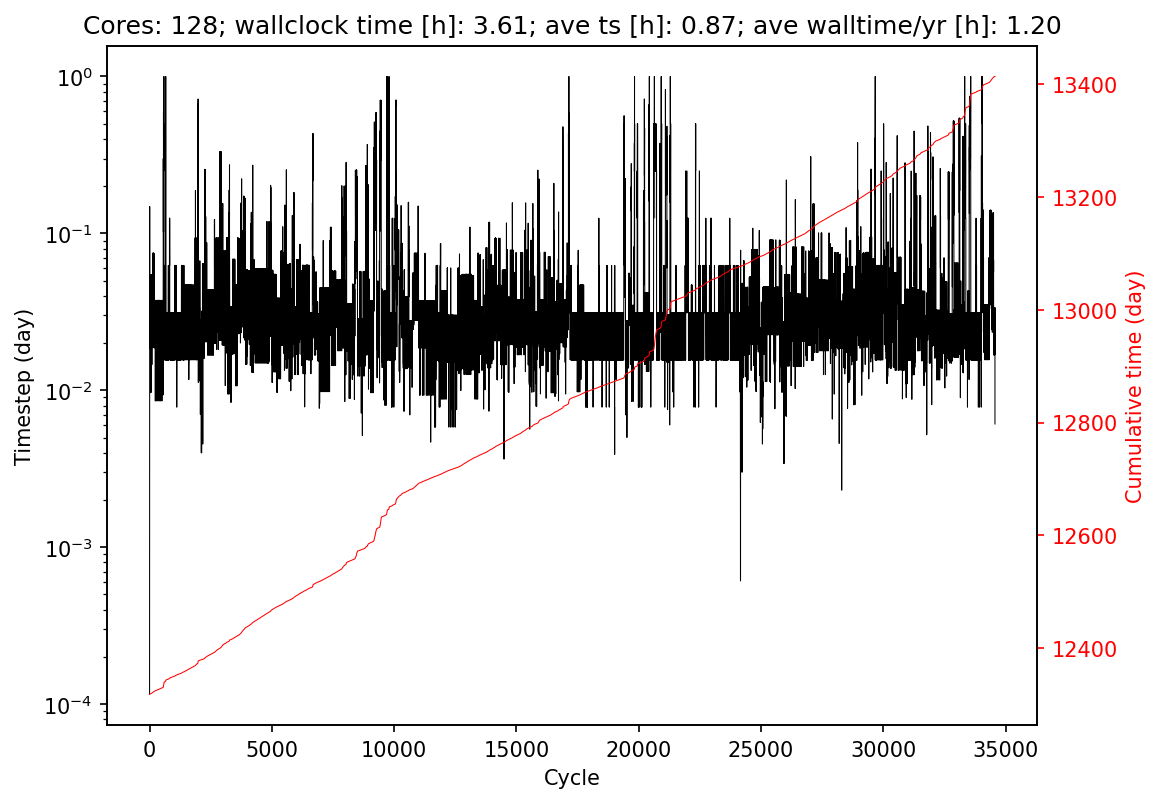

In [7]:
df = ATSutils.plot_timestep(model_dir)

## load output

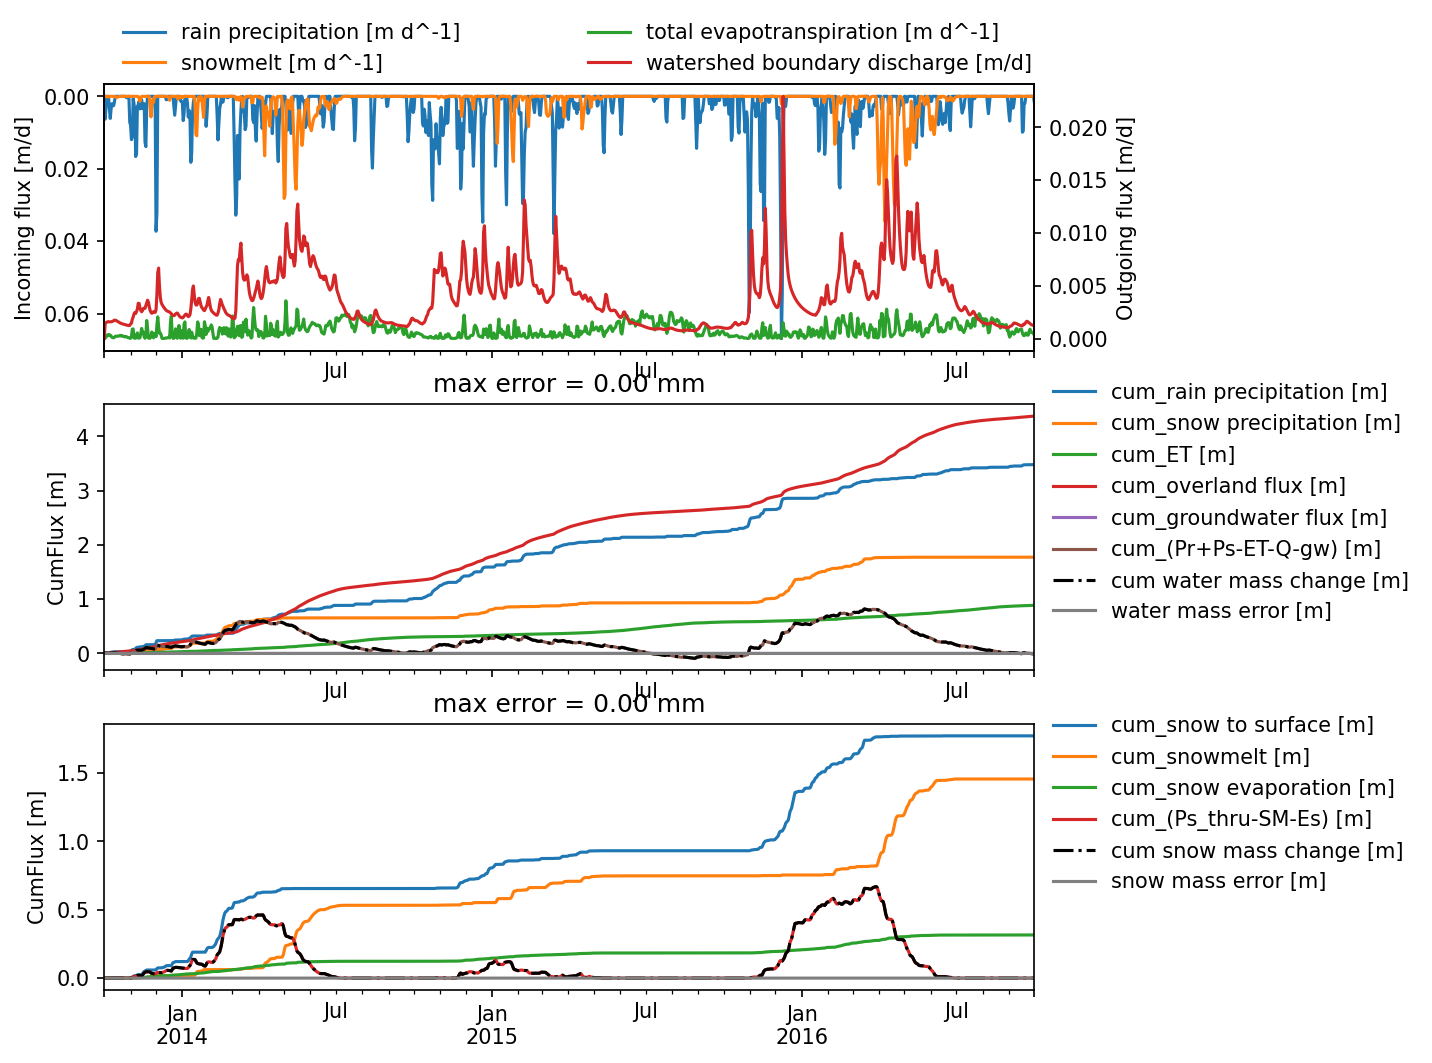

In [6]:
df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance-daily.dat",
                                canopy = True, plot = True)

In [9]:
df

time [d]  watershed boundary discharge [mol d^-1]  \
datetime                                                        
2013-10-01   12318.0                             0.000000e+00   
2013-10-02   12319.0                             1.624943e+10   
2013-10-03   12320.0                             1.732709e+10   
2013-10-04   12321.0                             1.761427e+10   
2013-10-05   12322.0                             1.812068e+10   
...              ...                                      ...   
2016-09-27   13410.0                             1.537765e+10   
2016-09-28   13411.0                             1.480093e+10   
2016-09-29   13412.0                             1.442483e+10   
2016-09-30   13413.0                             1.400720e+10   
2016-10-01   13414.0                             1.366545e+10   

            net groundwater flux [mol d^-1]  snowmelt [m d^-1]  \
datetime                                                         
2013-10-01                     0.000000e+00       0.000000e+00   
2013-10-02                     5.169614e-09       9.955617e-09   
2013-10-03                     2.422353e-09       6.123649e-08   
2013-10-04                     5.507585e-09       1.652089e-05   
2013-10-05                     8.173419e-09       1.860675e-04   
...                                     ...                ...   
2016-09-27                     7.536626e-09       1.646650e-16   
2016-09-28                     2.522629e-08       1.334022e-16   
2016-09-29                     6.644992e-09       1.385983e-16   
2016-09-30                     8.201366e-09       8.705331e-17   
2016-10-01                     7.549295e-09       1.936521e-17   

            snow precipitation [m d^-1]  rain precipitation [m d^-1]  \
datetime                                                               
2013-10-01                     0.000000                     0.000000   
2013-10-02                     0.000413                     0.006303   
2013-10-03                     0.000046                     0.003076   
2013-10-04                     0.000000                     0.000000   
2013-10-05                     0.000000                     0.000000   
...                                 ...                          ...   
2016-09-27                     0.000000                     0.000000   
2016-09-28                     0.000000                     0.000000   
2016-09-29                     0.000000                     0.000000   
2016-09-30                     0.000000                     0.000000   
2016-10-01                     0.000000                     0.001495   

            surface water content [mol]  subsurface water content [mol]  \
datetime                                                                  
2013-10-01                 1.299298e+11                    1.590360e+13   
2013-10-02                 1.372073e+11                    1.595098e+13   
2013-10-03                 1.396906e+11                    1.596514e+13   
2013-10-04                 1.383306e+11                    1.594690e+13   
2013-10-05                 1.361344e+11                    1.592917e+13   
...                                 ...                             ...   
2016-09-27                 1.237027e+11                    1.588666e+13   
2016-09-28                 1.220733e+11                    1.586717e+13   
2016-09-29                 1.209424e+11                    1.584746e+13   
2016-09-30                 1.195250e+11                    1.582881e+13   
2016-10-01                 1.201273e+11                    1.582635e+13   

            snow water content [mol]       SWE [m]  ...  cum_snowmelt [m]  \
datetime                                            ...                     
2013-10-01              0.000000e+00  0.000000e+00  ...      0.000000e+00   
2013-10-02              4.522700e+09  3.971900e-04  ...      9.955617e-09   
2013-10-03              4.934332e+09  4.333401e-04  ...      7.119211e-08   
2013-10-0

In [13]:
df.reset_index(inplace=True)

In [14]:
df['snow precipitation [mm d^-1]'].groupby(df['datetime'].dt.year).sum()

datetime
2013    120.919606
2014    684.453055
2015    561.760849
2016    406.434774
Name: snow precipitation [mm d^-1], dtype: float64

In [15]:
df['rain precipitation [mm d^-1]'].groupby(df['datetime'].dt.year).sum()

datetime
2013     250.192923
2014    1341.316315
2015    1266.573708
2016     620.296461
Name: rain precipitation [mm d^-1], dtype: float64

In [10]:
df['SWE [mm]'] = df["SWE [m]"]*1000
df['SWE at SNOTEL [mm]'] = df['SWE at SNOTEL [m]']*1000

In [13]:
df.to_csv(data_dir + f"postprocessed/riverbed_study/{icase}-wb.csv")

## precipitation

In [18]:
sub_df = df.loc["2015-10-01":"2016-09-30", :].copy()

In [60]:
itime = datetime.strptime("2015-10-01", "%Y-%m-%d")

/global/homes/p/pshuai/.conda/envs/widget/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/global/homes/p/pshuai/.conda/envs/widget/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/global/homes/p/pshuai/.conda/envs/widget/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


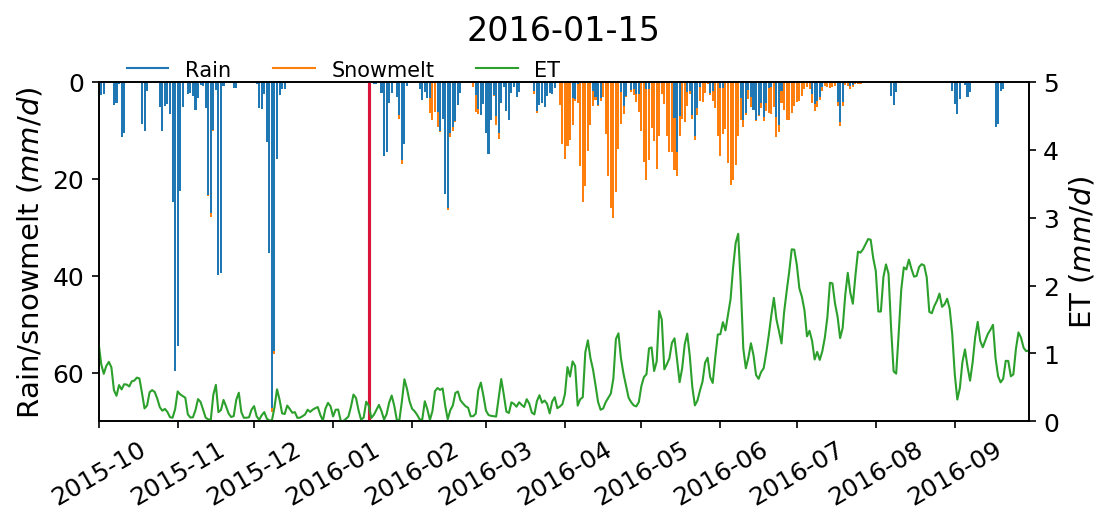

In [64]:
ATSutils.plot_precip(sub_df, itime = "2016-01-15")

In [70]:
sel_times = [datetime(2015,10,8), datetime(2015,11,9),datetime(2015,12,11),datetime(2016,1,9),
            datetime(2016,2,10),datetime(2016,3,13),datetime(2016,4,14),datetime(2016,5,16),
            datetime(2016,6,17),datetime(2016,7,19),datetime(2016,8,20),datetime(2016,9,21)]

In [71]:
# times = pd.date_range("2015-10-01", "2015-10-02")
times = sel_times
for itime in times:
    fig,ax = plt.subplots(1,1, figsize=(8,4))
    ATSutils.plot_precip(sub_df, itime = itime, ax = ax)
    fig.tight_layout()
    fig.savefig(figure_dir + f"precip/precip_{itime}.jpg", dpi = 300)
    plt.close(fig)    

## surface outlet discharge

### simulated vs observed discharge

In [6]:
obs_q = utils.convertUSGSgauge(fname_obs_q, "discharge", datetime_col="dateTime")
# obs_q = pd.read_csv(fname_obs_q)
# obs_q.plot(y = 'Flow [m^3/day]')

2022-11-28 12:11:57,126 - root - INFO: insert nan


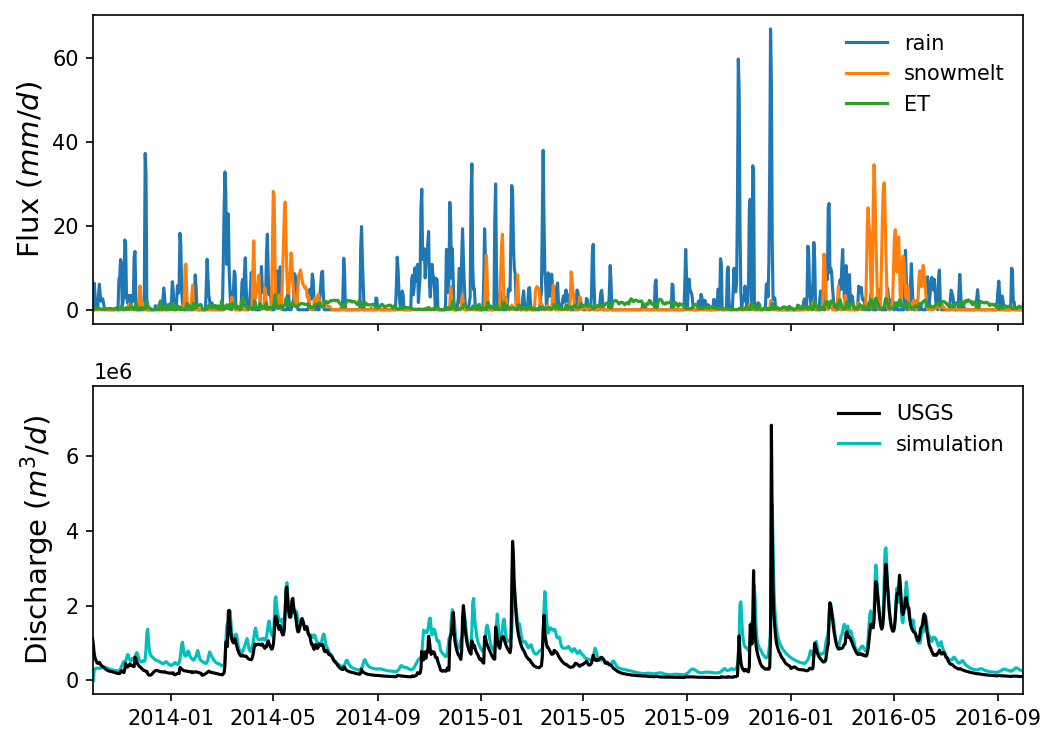

In [12]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex = True)
fontsize = 14
ax = axes[0]
ax.plot("rain precipitation [mm d^-1]", data = df)
ax.plot("snowmelt [mm d^-1]", data = df)
ax.plot('total evapotranspiration [mm d^-1]', data = df)
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('Flux ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(['rain', 'snowmelt', 'ET'], frameon = False)

ax = axes[1]
ax.plot('Discharge [m^3/d]', color = 'k', data =obs_q, label = 'USGS', zorder = 99)
ax.plot("watershed boundary discharge [m^3/d]", color = 'c', data =df, label = 'simulation', zorder = 1)
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simulation')
# df_base.plot(y = "watershed boundary discharge [m^3/d]", color = 'slategray', ax = ax, label = 'simulation (base)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0, 1e7])
ax.legend(frameon = False)
# plt.xticks(rotation=45)

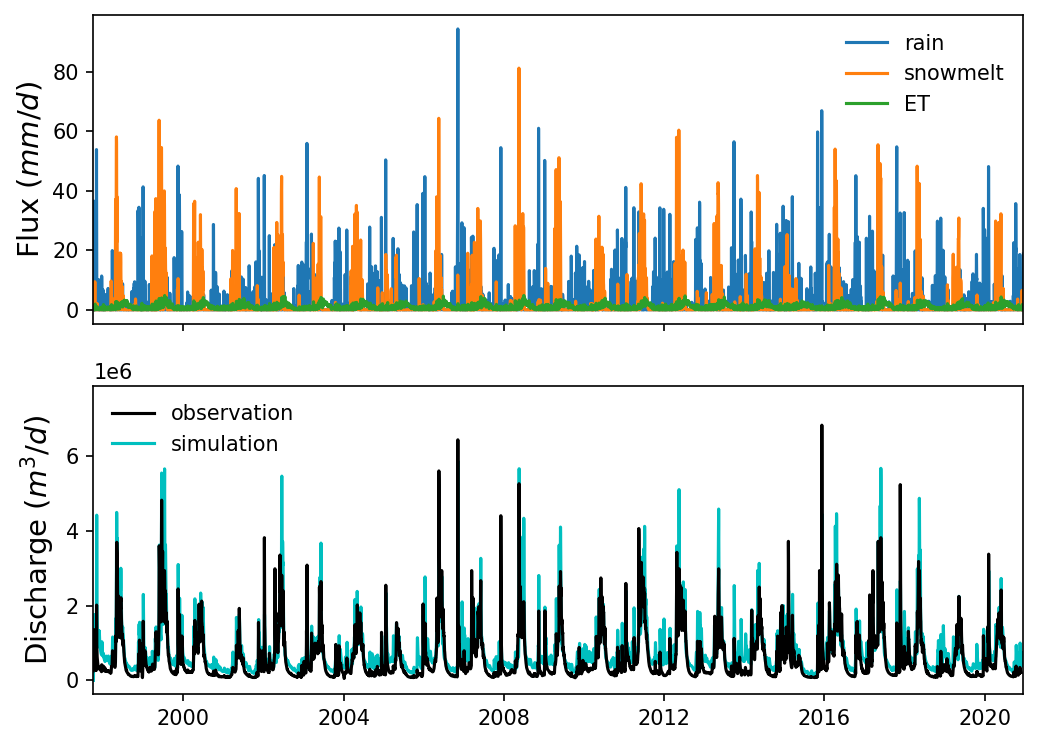

In [12]:
# fig.savefig("./figures/ARW_q_2000-2018.jpg", dpi = 300)
# plt.close(fig)

In [7]:
colors = mcolors.colors('matplotlib')

In [8]:
df = pd.read_csv(riverbed_dir + "res250m_tck0.0m-wb.csv", index_col=0, parse_dates=True)

In [9]:
sub_df = df.loc["2014-10-01":"2016-09-30", :].copy()

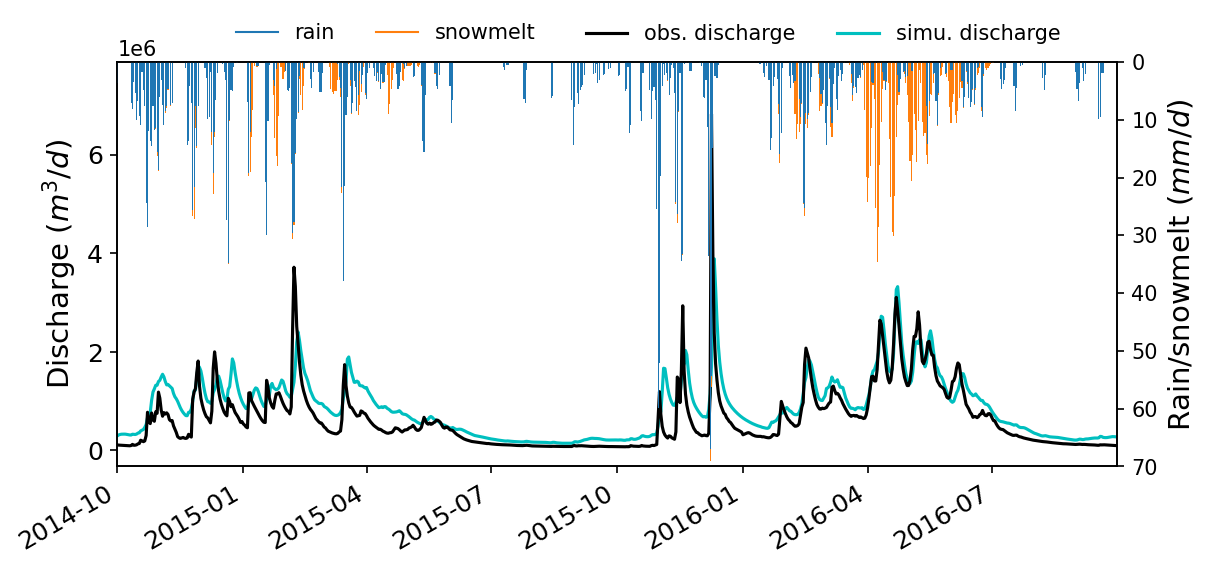

In [10]:
data = sub_df

fig, ax = plt.subplots(1,1, figsize=(8,4))
fontsize = 14
# ax = axes[0]

obs_q.plot( y='Discharge [m^3/d]', color = 'k', ax = ax, label = 'obs. discharge', zorder = 99)
data.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simu. discharge', zorder = 2)

ax1 = ax.twinx()
ax1.bar(data.index, data["rain precipitation [mm d^-1]"], lw=1.5)
ax1.bar(data.index, data["snowmelt [mm d^-1]"], lw=1.5, bottom = data["rain precipitation [mm d^-1]"])

ax1.set_ylim([0,70])
ax1.invert_yaxis()
ax1.set_ylabel('Rain/snowmelt ($mm/d$)', fontsize = fontsize)
utils.custom_legend(colors[:2], ['rain', 'snowmelt'], loc = 'lower left',  ax = ax1, 
                    bbox_to_anchor =(0.1 , 1.0), ncol = 2)
ax1.tick_params(axis=u'x', which=u'minor',length=0)


ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlim(data.index[0], data.index[-1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'x', which=u'minor',length=0)
# ax.set_xlim(datetime(2015,10,1), datetime(2016,10,1))
# ax.set_ylim([0, 1e7])
ax.set_xlabel('')
ax.legend(frameon = False, loc = 'upper left', bbox_to_anchor =(0.45 , 1.14), ncol = 2)
# plt.xticks(rotation=45)
plt.tight_layout()
fig.autofmt_xdate()

In [11]:
fig.savefig(f"./figures/ARW_q_simu_obs_base.jpg", dpi = 300)
plt.close(fig)

In [40]:
utils.get_metrics(obs_q['Discharge [m^3/d]'].index, obs_q['Discharge [m^3/d]'].values, 
                  data["watershed boundary discharge [m^3/d]"].index, data["watershed boundary discharge [m^3/d]"].values,
                 start_date=datetime(2014,10,1), end_date=datetime(2016,9,30))

({'pearsonr': 0.8418166693358993,
  'R^2': 0.7086553047717867,
  'RMSE': 411997.8460457553,
  'rRMSE': 0.6415449583119462,
  'NSE': 0.5952371578898553,
  'logNSE': 0.6414855355622684,
  'bias': -211918.99596518686,
  'pbias': 32.999095683839194,
  'KGE': 0.6257011301457978,
  'npKGE': 0.6635616983287191,
  'mKGE': 0.5221791775804483},
       datetime         obs           simu
 1   2014-10-02  108872.810  316154.369679
 2   2014-10-03  107160.204  324724.817113
 3   2014-10-04  104713.624  329982.331044
 4   2014-10-05  102267.044  331863.339597
 5   2014-10-06  100309.780  331784.722846
 ..         ...         ...            ...
 725 2016-09-25  107649.520  274278.010283
 726 2016-09-26  105692.256  279442.081856
 727 2016-09-27  104713.624  281598.616515
 728 2016-09-28  101288.412  280028.672667
 729 2016-09-29  100065.122  278073.548570
 
 [729 rows x 3 columns])

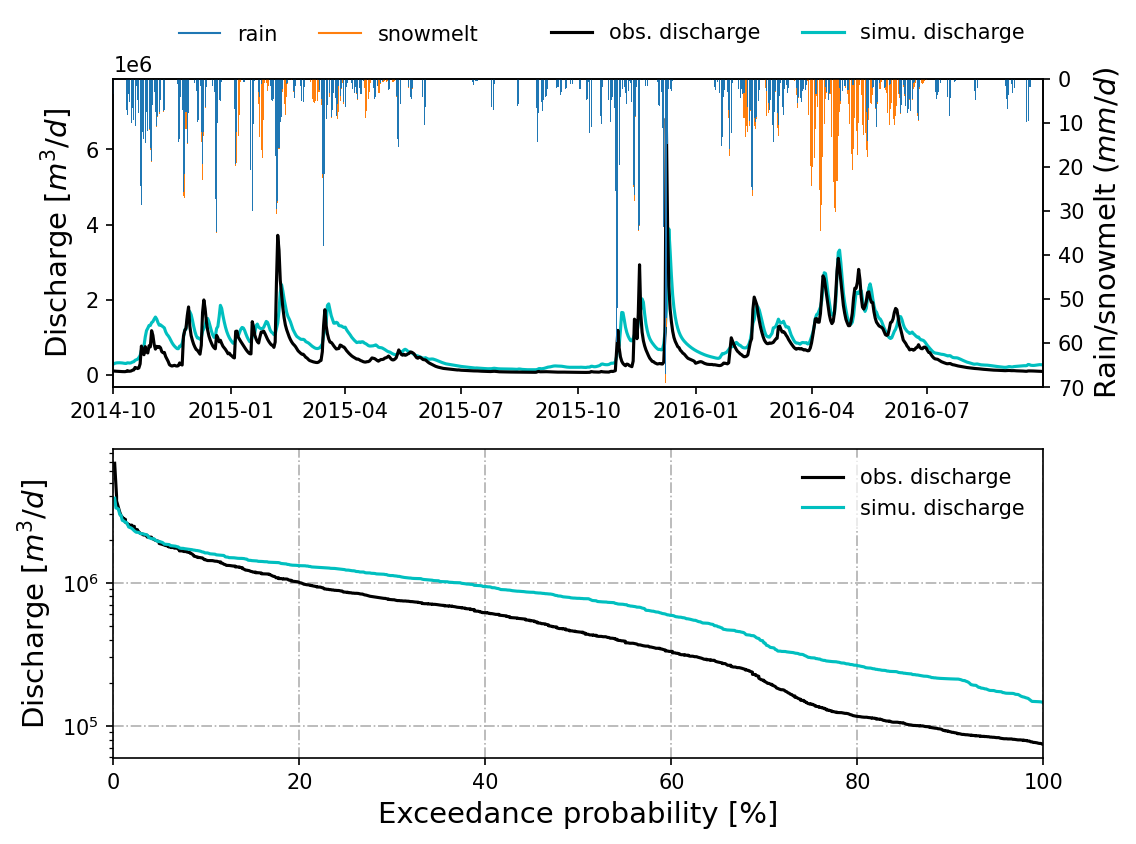

In [38]:
data = sub_df

# fig, axes = plt.subplots(2,1, figsize=(8,8))
fig = plt.figure()
fig.set_size_inches(8, 6)

gs = gridspec.GridSpec(2, 1, height_ratios=[2,2])
gs.update(hspace = 0.2) # adjust vertical spacing b/w subplots
ax = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1], sharex=ax1)

fontsize = 14
# ax = axes[0]


obs_q.plot( y='Discharge [m^3/d]', color = 'k', ax = ax, label = 'obs. discharge', zorder = 99)
data.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simu. discharge',
          zorder = 2)

ax1 = ax.twinx()
ax1.bar(data.index, data["rain precipitation [mm d^-1]"], lw=1.5)
ax1.bar(data.index, data["snowmelt [mm d^-1]"], lw=1.5, bottom = data["rain precipitation [mm d^-1]"])

ax1.set_ylim([0,70])
ax1.invert_yaxis()
ax1.set_ylabel('Rain/snowmelt ($mm/d$)', fontsize = fontsize)
utils.custom_legend(colors[:2], ['rain', 'snowmelt'], loc = 'lower left',  ax = ax1, 
                    bbox_to_anchor =(0.05 , 1.05), ncol = 2)
ax1.tick_params(axis=u'x', which=u'minor',length=0)


ax.set_ylabel('Discharge [$m^3/d$]', fontsize = fontsize)
ax.set_xlim(data.index[0], data.index[-1])
# ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'x', which=u'minor',length=0)
# ax.set_xlim(datetime(2015,10,1), datetime(2016,10,1))
# ax.set_ylim([0, 1e7])
ax.set_xlabel('')
ax.legend(frameon = False, loc = 'upper left', bbox_to_anchor =(0.45 , 1.24), ncol = 2)
# plt.xticks(rotation=45)
# plt.tight_layout()
# fig.autofmt_xdate()

# ax = axes[1]
ax = plt.subplot(gs[1])
gp.plot_FDC([obs_q['Discharge [m^3/d]'], data["watershed boundary discharge [m^3/d]"]], ['obs. discharge', 'simu. discharge'], 
            ['k','c'] ,
            ['-','-'],
            start_date = '2014-10-01', end_date = '2016-10-01', 
            # time_index = obs_q.loc['2016-10-01':'2019-10-01'].dropna().index,
            # var = ivar,
            ax=ax)

In [39]:
fig.savefig(f"./figures/ARW_q_simu_obs_base-FDC.jpg", dpi = 300)
plt.close(fig)

## simu vs obs ET/SWE

In [154]:
dates = [datetime(2014,10,1), datetime(2016,9,30)]

In [16]:
# df_base = pd.read_csv(fname_water_balance_base, index_col=0, parse_dates=True)

In [202]:
df_obs_swe = pd.read_csv(fname_SNOTEL, index_col='dates', parse_dates=True)

df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

In [203]:
df_et = df.loc[dates[0]:dates[1], ['total evapotranspiration [mm d^-1]']].copy()

In [204]:
# time_ind = df_et.dropna().index
time_ind = df_obs_et.loc[dates[0]:dates[1], :].index

# df_8d_et = df_et.dropna().copy()
df_8d_et = df_et.loc[time_ind, ].copy()
for i in np.arange(len(time_ind))[:]:
    itime = time_ind[i]
    if i == 0:
        btime = df_et.index[0]
    else:
        btime = time_ind[i-1]
        
    istart = list(df_et.index).index(btime)
    iend = list(df_et.index).index(itime)    
    # `loc` includes both ends, but `iloc` does not include end bound!
    isum = df_et.iloc[istart:iend+1, :].sum(min_count = 1) # return NA is sum() contains NA
    df_8d_et.loc[itime, :] = isum.values

In [205]:
df_8d_et['obs ET [mm/8d]'] = df_obs_et.loc[time_ind[0] : time_ind[-1], 'ET [mm/d]'].values
# df_8d_et.drop(columns = ['obs ET [mm/d]'], inplace = True)

In [206]:
df_8d_et.rename(columns={'total evapotranspiration [mm d^-1]':'simu ET [mm/8d]'}, inplace = True)
# df_8d_et.to_csv(data_dir + f"postprocessed/riverbed_study/{icase}_8d-ET.csv")

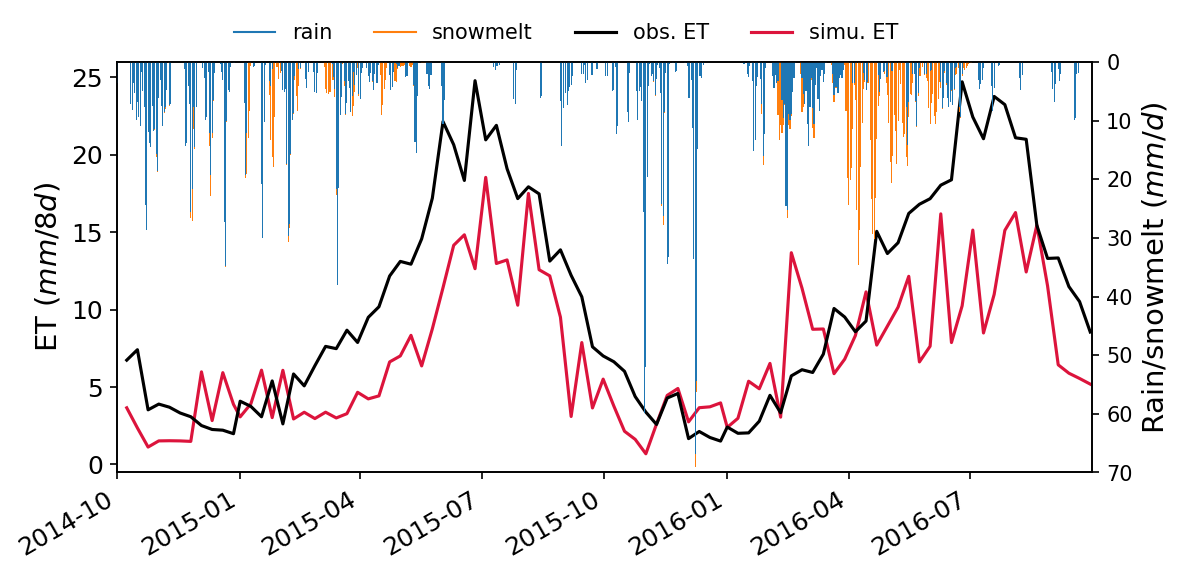

In [207]:
data = sub_df

fig, ax = plt.subplots(1,1, figsize=(8,4))
fontsize = 14
# ax = axes[0]

df_8d_et.plot( y='obs ET [mm/8d]', color = 'k', ax = ax, label = 'obs. ET', zorder = 99)
df_8d_et.plot(y = "simu ET [mm/8d]", color = 'crimson', ax = ax, label = 'simu. ET', zorder = 2)

ax1 = ax.twinx()
ax1.bar(data.index, data["rain precipitation [mm d^-1]"], lw=1.5)
ax1.bar(data.index, data["snowmelt [mm d^-1]"], lw=1.5, bottom = data["rain precipitation [mm d^-1]"])

ax1.set_ylim([0,70])
ax1.invert_yaxis()
ax1.set_ylabel('Rain/snowmelt ($mm/d$)', fontsize = fontsize)
utils.custom_legend(colors[:2], ['rain', 'snowmelt'], loc = 'lower left',  ax = ax1, 
                    bbox_to_anchor =(0.1 , 1.0), ncol = 2)
ax1.tick_params(axis=u'x', which=u'minor',length=0)

ax.set_ylabel('ET ($mm/8d$)', fontsize = fontsize)
ax.set_xlim(data.index[0], data.index[-1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'x', which=u'minor',length=0)
# ax.set_xlim(datetime(2015,10,1), datetime(2016,10,1))
# ax.set_ylim([0, 1e7])
ax.set_xlabel('')
ax.legend(frameon = False, loc = 'upper left', bbox_to_anchor =(0.45 , 1.14), ncol = 2)
# plt.xticks(rotation=45)
plt.tight_layout()
fig.autofmt_xdate()

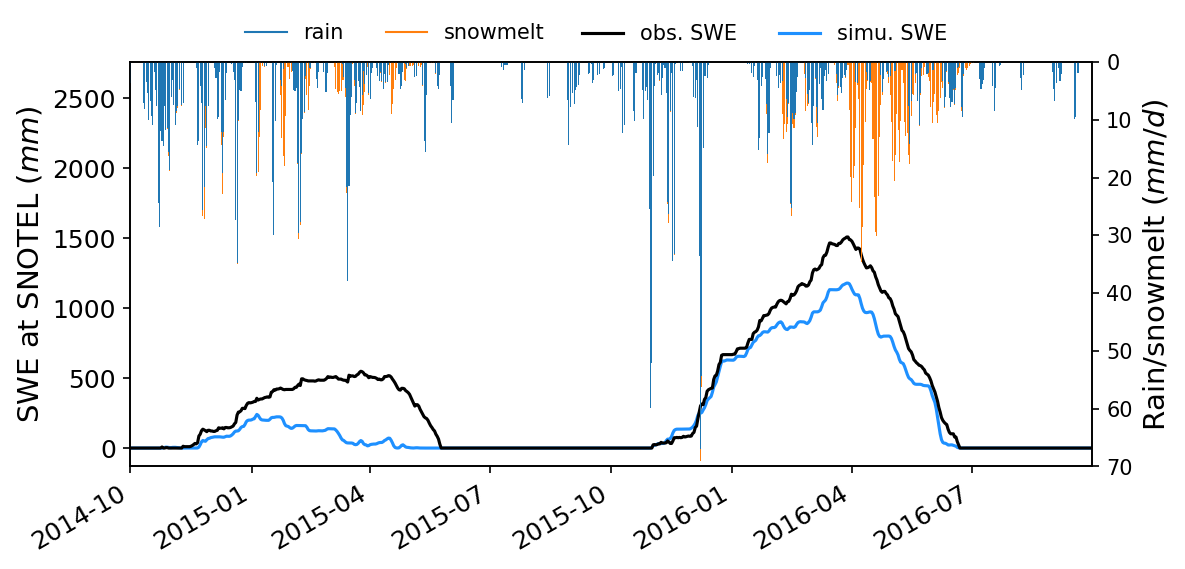

In [208]:
data = sub_df

fig, ax = plt.subplots(1,1, figsize=(8,4))
fontsize = 14
# ax = axes[0]
df_obs_swe.plot( y='snow_water_equivalent', color = 'k', ax = ax, label = 'obs. SWE', zorder = 99)
# df_8d_et.plot( y='obs ET [mm/8d]', color = 'k', ax = ax, label = 'obs. ET', zorder = 99)
data.plot(y = "SWE at SNOTEL [mm]", color = 'dodgerblue', ax = ax, label = 'simu. SWE', zorder = 2)

ax1 = ax.twinx()
ax1.bar(data.index, data["rain precipitation [mm d^-1]"], lw=1.5)
ax1.bar(data.index, data["snowmelt [mm d^-1]"], lw=1.5, bottom = data["rain precipitation [mm d^-1]"])

ax1.set_ylim([0,70])
ax1.invert_yaxis()
ax1.set_ylabel('Rain/snowmelt ($mm/d$)', fontsize = fontsize)
utils.custom_legend(colors[:2], ['rain', 'snowmelt'], loc = 'lower left',  ax = ax1, 
                    bbox_to_anchor =(0.1 , 1.0), ncol = 2)
ax1.tick_params(axis=u'x', which=u'minor',length=0)


ax.set_ylabel('SWE at SNOTEL ($mm$)', fontsize = fontsize)
ax.set_xlim(data.index[0], data.index[-1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'x', which=u'minor',length=0)
# ax.set_xlim(datetime(2015,10,1), datetime(2016,10,1))
# ax.set_ylim([0, 1e7])
ax.set_xlabel('')
ax.legend(frameon = False, loc = 'upper left', bbox_to_anchor =(0.45 , 1.14), ncol = 2)
# plt.xticks(rotation=45)
plt.tight_layout()
fig.autofmt_xdate()

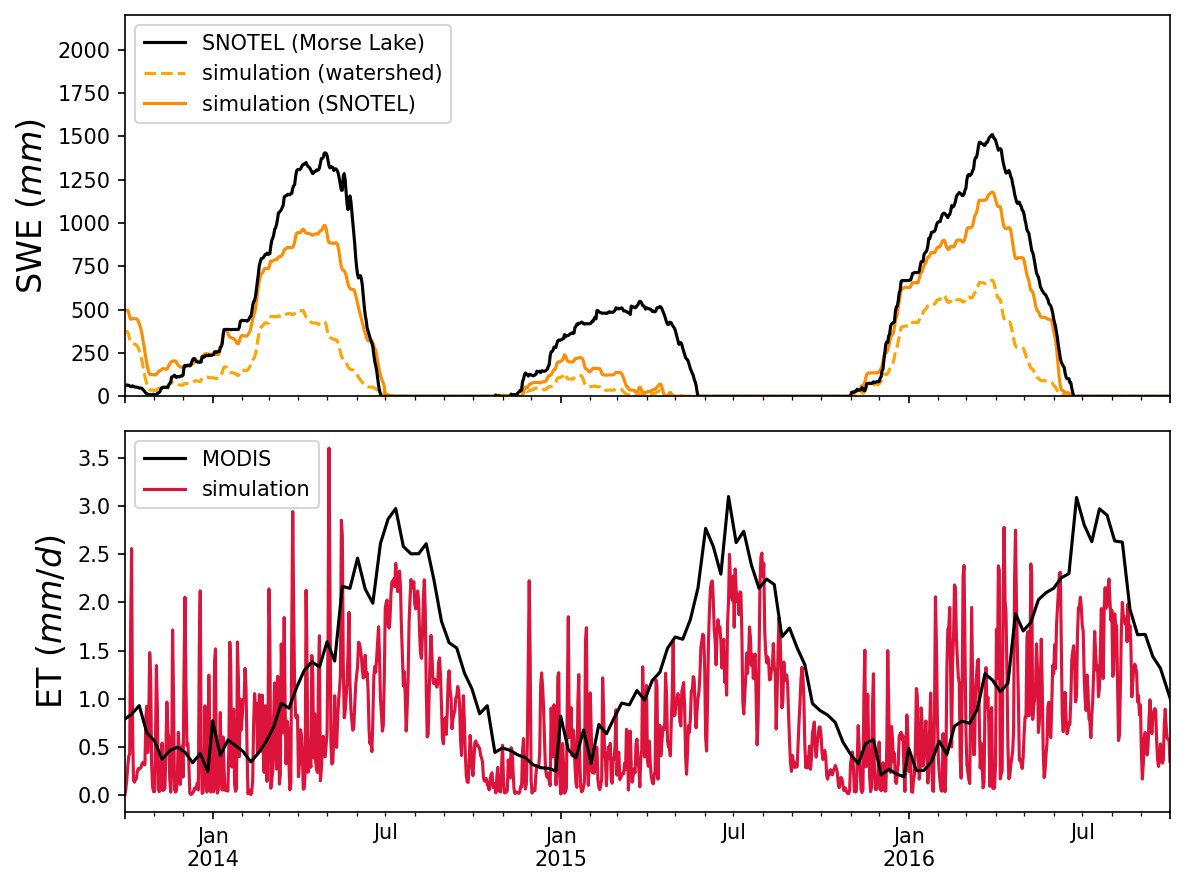

In [83]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex = True)

# xlim = [datetime(1999,10,1), datetime(2009,10,1)]

# ax = axes[0]
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'USGS', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", style = '-', color = 'c', ax = ax, label = 'simulation')
# # df_base.plot(y = "watershed boundary discharge [m^3/d]", style = '-.', ax = ax, label = 'simulation (base)')

# ax.set_ylabel('Discharge ($m^3/d$)', fontsize = 16)
# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(xlim)
# # ax.set_ylim([0, 3e5])
# ax.legend(loc = 'upper left')

ax = axes[0]
df_obs_swe.plot( y='snow_water_equivalent', color = 'k', ax = ax, label = 'SNOTEL (Morse Lake)', zorder = 99)
# df.plot(y = "snowmelt [mm d^-1]", style = '-', color = 'darkorange',  ax = ax, label = 'simulation')
df.plot(y = "SWE [mm]", style = '--', color = 'orange',  ax = ax, label = 'simulation (watershed)')
df.plot(y = "SWE at SNOTEL [mm]", style = '-', color = 'darkorange',  ax = ax, label = 'simulation (SNOTEL)')
# ax.plot(df.index, df["SWE [m]"]*1000, '--', color = 'orange',   label = 'simulation')
# ax.plot(df.index, df["SWE at SNOTEL [m]"]*1000,  '-', color = 'darkorange',   label = 'simulation')
# df_base.plot(y = "snowmelt [m d^-1]", style = '-.', ax = ax, label = 'simulation (base)')

ax.set_ylabel('SWE ($mm$)', fontsize = 16)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(datetime(2014,10,1), datetime(2015,10,1))
ax.set_xlim(xlim)
ax.set_ylim([0, 2200])
ax.legend(loc = 'upper left')

ax = axes[1]
obs_ET_daily_mm.plot(ax=ax, color = 'k',  label = 'MODIS', zorder = 99)
# ax.plot(obs_ET_daily.index, obs_ET_daily.values, color = 'k',  label = 'MODIS', zorder = 99)
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
df.plot(y = "total evapotranspiration [mm d^-1]", style = '-', color = 'crimson',  ax = ax, label = 'simulation')
# df_base.plot(y = "total evapotranspiration [m d^-1]", style = '-.', ax = ax, label = 'simulation (base)')

ax.set_ylabel('ET ($mm/d$)', fontsize = 16)
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(datetime(2014,10,1), datetime(2015,10,1))
# ax.set_xlim(xlim)
# ax.set_ylim([0, 3e5])
ax.legend(loc = 'upper left')

plt.tight_layout()

In [37]:
fig.savefig("./figures/ARW_et_swe_1999-2009.jpg", dpi = 300)
plt.close(fig)

## water budget

In [14]:
df['-cum_ET [m]'] = -df['cum_ET [m]']
df['cum_P [m]'] = df['cum_rain precipitation [m]'] + df['cum_snow precipitation [m]']
df['P [m/d]'] = df['rain precipitation [m d^-1]'] + df['snow precipitation [m d^-1]']
df['-ET [m/d]'] = -df['total evapotranspiration [m d^-1]']
df['-cum_Q [m]'] = -df['cum_overland flux [m]']

In [15]:
def get_storage_change(df, col = "cum water mass change [m]"):
    
    storage_change = df[col].values[1:] - df[col].values[:-1]
    storage_gain = np.array([i if i > 0 else 0 for i in storage_change])
    storage_lose = np.array([i if i < 0 else 0 for i in storage_change])

    df_storage = df[[col]].iloc[1:]
    df_storage['storage_gain [m]'] = storage_gain
    df_storage['storage_lose [m]'] = storage_lose

    df_storage['cum-storage_gain [m]'] = np.cumsum(storage_gain)
    df_storage['cum-storage_lose [m]'] = np.cumsum(storage_lose) 
    
    return df_storage

In [16]:
df_total_storage = get_storage_change(df, col = "total water content [m]")

df_total_storage['base flow [m/d]'] = -df_total_storage['storage_lose [m]'] + df['-ET [m/d]'].iloc[1:]
df_total_storage['base flow [m/d]'] = [i if i>0 else 0 for i in df_total_storage['base flow [m/d]']]
df_total_storage['overland flow [m/d]'] = df['watershed boundary discharge [m/d]'].iloc[1:] - df_total_storage['base flow [m/d]']
df_total_storage['overland flow [m/d]'] = [i if i>0 else 0 for i in df_total_storage['overland flow [m/d]']]

In [147]:
# df_subsurface_storage = get_storage_change(df, col="subsurface water content [m]")
# df_surface_storage = get_storage_change(df, col="surface water content [m]")
# df_snow_storage = get_storage_change(df, col="snow water content [m]")
# df_canopy_storage = get_storage_change(df, col="canopy water content [m]")

# df_subsurface_storage['base flow [m]'] = -df_subsurface_storage['storage_lose [m]'] - df['transpiration [m d^-1]'].iloc[1:]

In [17]:
df.to_csv(data_dir + f"postprocessed/riverbed_study/{icase}-wb.csv")
df_total_storage.to_csv(data_dir + f"postprocessed/riverbed_study/{icase}_total-storage.csv")

### **plot streamflow component**

(0.0, 0.015)

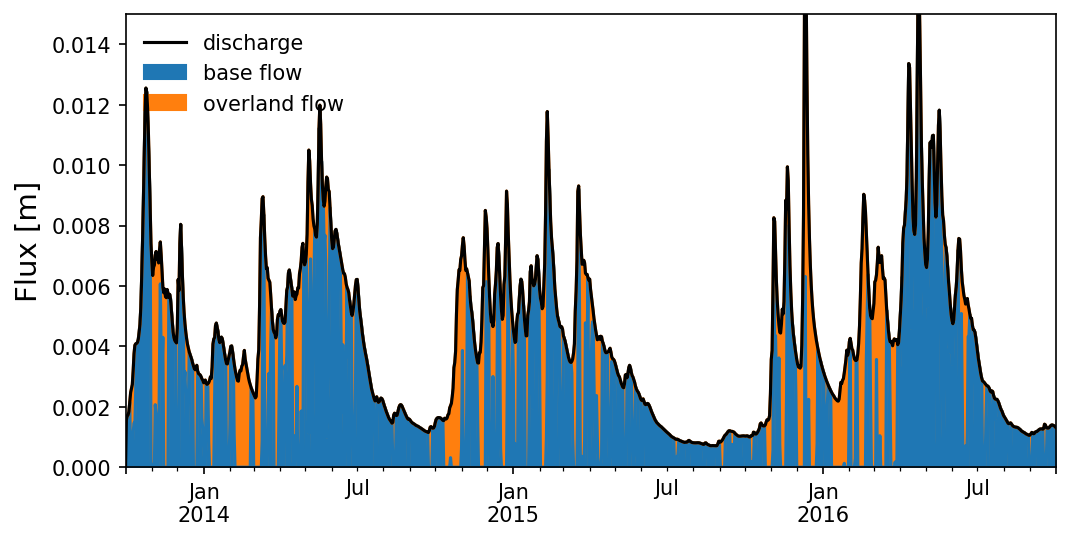

In [132]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

# xlim = [datetime(2000,10,1), datetime(2001,10,1)]

df.plot(y = ['watershed boundary discharge [m/d]'], style = ['-'], color = [ 'k'], ax = ax, label = ['discharge'], zorder=99)
df_total_storage.plot.area(y=['base flow [m/d]', 'overland flow [m/d]'], ax=ax, label = ['base flow', 'overland flow'])

ax.set_ylabel('Flux [m]', fontsize=14)
ax.legend(loc='upper left', fontsize = 10, 
          # bbox_to_anchor = (1.0,1.0), 
          frameon = False)

# ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([0, 0.015])

### **plot cumulative change**

Text(0.5, 0, '')

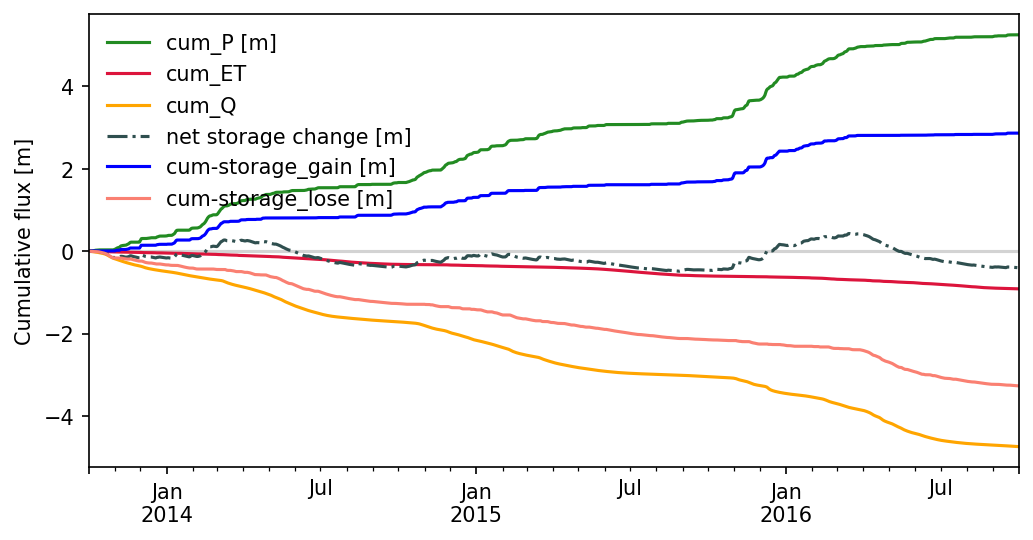

In [119]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

# xlim = [datetime(1997,10,1), datetime(1998,10,1)]

# df.plot(y=["cum_rain precipitation [m]", 
#            "cum_snow precipitation [m]"], ax = ax)
df.plot(y = ["cum_P [m]"], style = ['-'], color = [ 'forestgreen'], ax = ax)
df.plot(y = ["-cum_ET [m]"], style = ['-'], color = [ 'crimson'], ax = ax, label = ['cum_ET'])
df.plot(y = ["-cum_Q [m]"], style = ['-'], color = [ 'orange'], ax = ax, label = ['cum_Q'])
df.plot(y = ['cum water mass change [m]'], style = ['-.'], color = [ 'darkslategray'], 
        ax = ax, label = ['net storage change [m]'])
df_total_storage.plot(y = ['cum-storage_gain [m]'], style = ['-'], color = [ 'blue'], ax = ax)
df_total_storage.plot(y = ['cum-storage_lose [m]'], style = ['-'], color = [ 'salmon'], ax = ax)
# df.plot(y = ['water mass error [m]'], style = ['-'], color = [ 'lightgrey'], ax = ax, label = [''])
ax.hlines(0, df.index[0], df.index[-1], colors='lightgray')
ax.set_ylabel('Cumulative flux [m]')
ax.legend(loc='upper left', fontsize = 10, 
          # bbox_to_anchor = (1.0,1.1), 
          frameon = False)
# max_error = max(abs(df['water mass error [m]'].max()), abs(df['water mass error [m]'].min()))
#         print(max_error)
# ax.set_title(f'max error = {max_error*1000:.2f} mm')
# ax.xaxis.set_ticklabels([])
# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(xlim)
ax.set_xlabel('')
# ax.set_ylim([-2, 2])

## Base run

In [7]:
obs_q = utils.convertUSGSgauge(fname_obs_q, "discharge")
# obs_q.plot(y = 'Flow [m^3/day]')

2022-01-26 14:46:41,222 - root - INFO: insert nan


In [8]:
df_obs_swe = pd.read_csv(fname_SNOTEL, index_col='dates', parse_dates=True)

df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

In [19]:
df = pd.read_csv("/global/project/projectdirs/m1800/pin/yakima/output/ARW_250m-c128-riverbed/ARW_fixed_Srad_wb_1997-2020.csv", 
                 index_col=0, parse_dates=True)

In [14]:
df = ATSutils.load_waterBalance("/global/cscratch1/sd/pshuai/yakima/sensitivity_analysis_700/base-1997_2020/", WB_filename="water_balance-daily.dat",
                                canopy = True, plot = False,
                               )

In [11]:
df['SWE [mm]'] = df['SWE [m]']*1000
df['SWE at SNOTEL [mm]'] = df['SWE at SNOTEL [m]']*1000

In [12]:
colors = mcolors.colors('matplotlib')

In [46]:
# sub_df = df.loc["2014-10-01":"2016-09-30", :].copy()

### Discharge

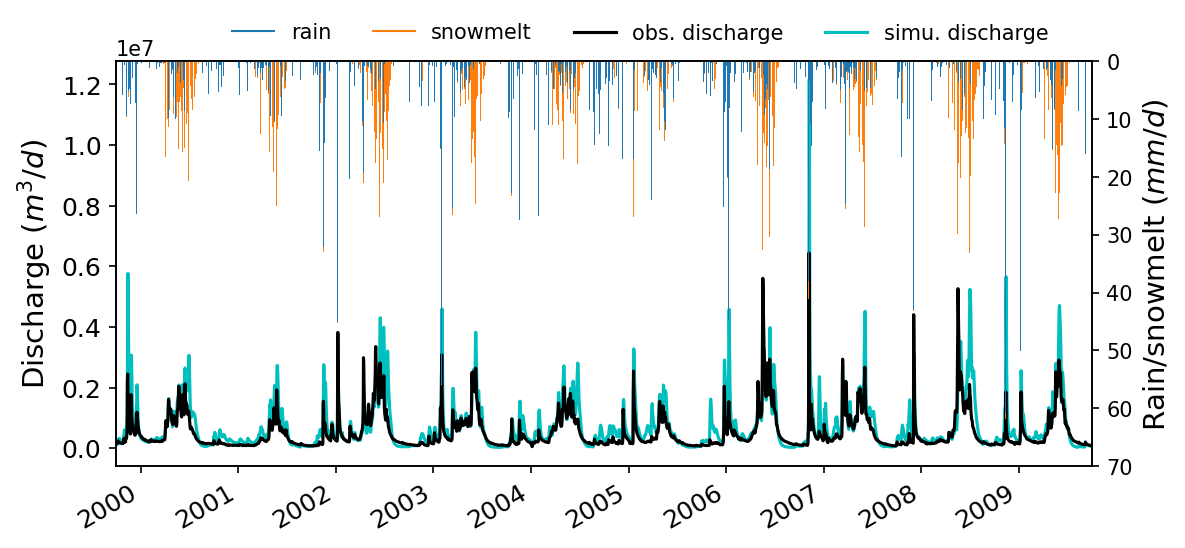

In [13]:
data = df.loc["1999-10-01":"2009-09-30", :].copy()

fig, ax = plt.subplots(1,1, figsize=(8,4))
fontsize = 14
# ax = axes[0]

obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'obs. discharge', zorder = 99)
data.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simu. discharge', zorder = 2)

ax1 = ax.twinx()
ax1.bar(data.index, data["rain precipitation [mm d^-1]"], lw=1.5)
ax1.bar(data.index, data["snowmelt [mm d^-1]"], lw=1.5, bottom = data["rain precipitation [mm d^-1]"])

ax1.set_ylim([0,70])
ax1.invert_yaxis()
ax1.set_ylabel('Rain/snowmelt ($mm/d$)', fontsize = fontsize)
utils.custom_legend(colors[:2], ['rain', 'snowmelt'], loc = 'lower left',  ax = ax1, 
                    bbox_to_anchor =(0.1 , 1.0), ncol = 2)
ax1.tick_params(axis=u'x', which=u'minor',length=0)


ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlim(data.index[0], data.index[-1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'x', which=u'minor',length=0)
# ax.set_xlim(datetime(2015,10,1), datetime(2016,10,1))
# ax.set_ylim([0, 1e7])
ax.set_xlabel('')
ax.legend(frameon = False, loc = 'upper left', bbox_to_anchor =(0.45 , 1.14), ncol = 2)
# plt.xticks(rotation=45)
plt.tight_layout()
fig.autofmt_xdate()

In [42]:
fig.savefig(figure_dir + "model_comparison/ARW_q_1999-2009.jpg", dpi = 300)
plt.close(fig)

### calibrated vs uncalibrated

In [16]:
df_uncal = ATSutils.load_waterBalance("/global/cscratch1/sd/pshuai/yakima/sensitivity_analysis_700/base-1997_2020/", WB_filename="water_balance-daily.dat",
                                canopy = True, plot = False,
                               )

In [15]:
df_cal = ATSutils.load_waterBalance("/global/cscratch1/sd/pshuai/yakima/forward_runs/forward_qetsc-1997_2020/", WB_filename="water_balance-daily.dat",
                                canopy = True, plot = False,
                               )

(10136.0, 16269.0)

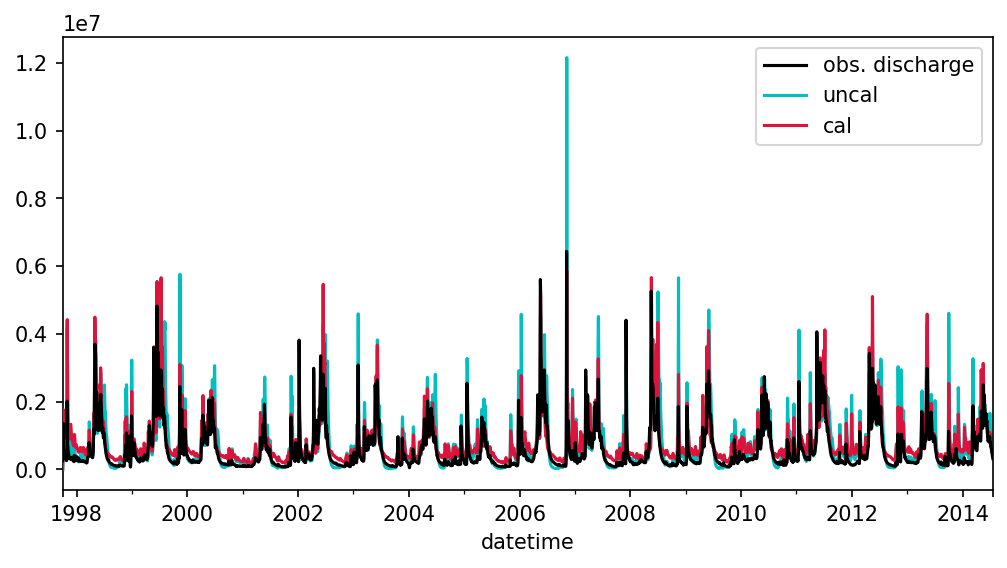

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'obs. discharge', zorder = 99)
df_uncal.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'uncal', zorder = 2)
df_cal.plot(y = "watershed boundary discharge [m^3/d]", color = 'crimson', ax = ax, label = 'cal', zorder = 5)
ax.set_xlim(df.index[0], df.index[-1])

### SWE and ET

In [15]:
dates = [datetime(2000,1,1), datetime(2019,12,27)]

In [14]:
df_et = df.loc[dates[0]:dates[1], ['total evapotranspiration [mm d^-1]']].copy()

The 8-day ET (0.1mm/8days or 0.1mm/5days) is the sum of ET during these 8-day time periods
(5 days for 361 composite data in 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 6 days for
361 in 2000, 2004, 2008). 

see [Mu et al., ](http://files.ntsg.umt.edu/data/NTSG_Products/MOD16/MOD16_global_evapotranspiration_description.pdf) for detailed description.

In [17]:
# time_ind = df_et.dropna().index
time_ind = df_obs_et.loc[dates[0]:dates[1], :].index

# df_8d_et = df_et.dropna().copy()
df_8d_et = df_et.loc[time_ind, ].copy()
for i in np.arange(len(time_ind))[:]:
    itime = time_ind[i]
    if i == 0:
        btime = df_et.index[0]
    else:
        btime = time_ind[i-1]
        
    istart = list(df_et.index).index(btime)
    iend = list(df_et.index).index(itime)    
    # `loc` includes both ends, but `iloc` does not include end bound!
    isum = df_et.iloc[istart:iend+1, :].sum(min_count = 1) # return NA is sum() contains NA
    df_8d_et.loc[itime, :] = isum.values

In [18]:
df_8d_et['obs ET [mm/8d]'] = df_obs_et.loc[time_ind[0] : time_ind[-1], 'ET [mm/d]'].values
# df_8d_et.drop(columns = ['obs ET [mm/d]'], inplace = True)

In [19]:
df_8d_et.rename(columns={'total evapotranspiration [mm d^-1]':'simu ET [mm/8d]'}, inplace = True)

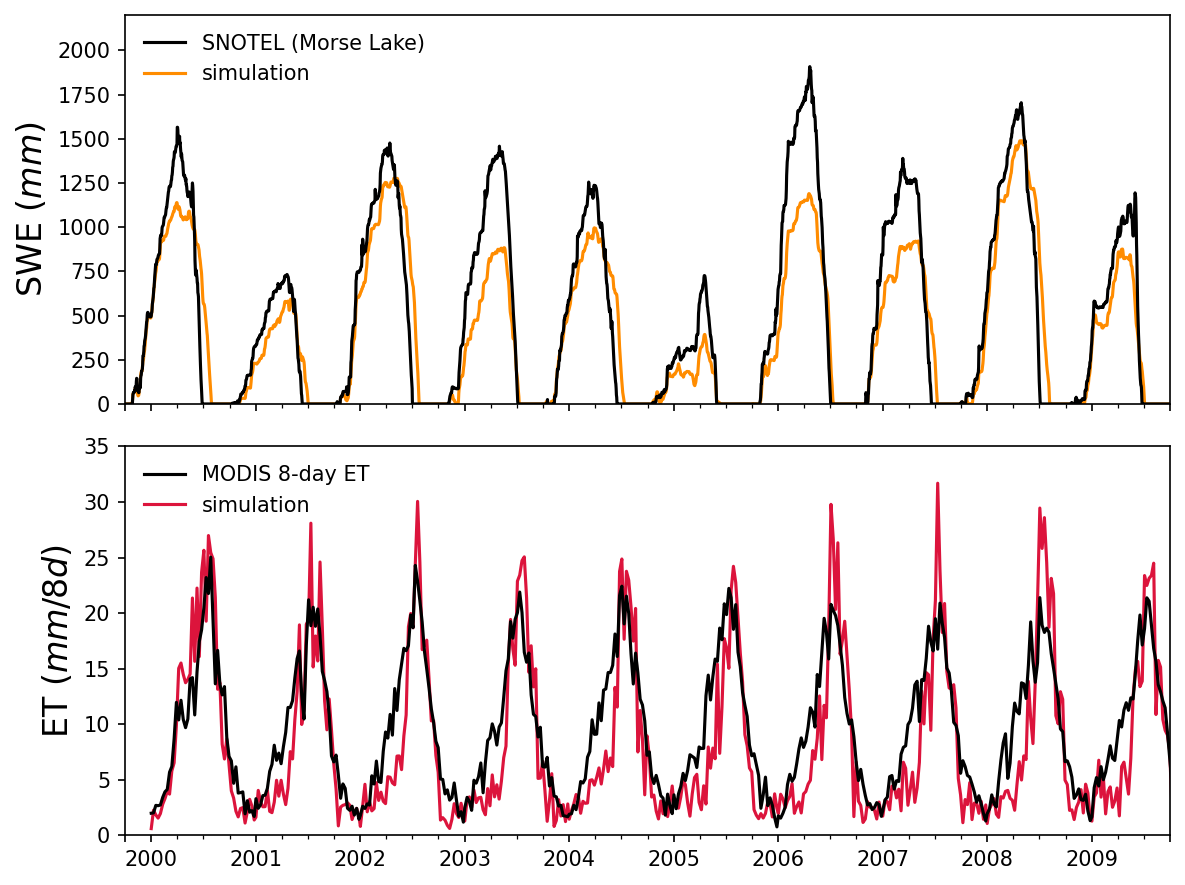

In [37]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex = True)

xlim = [datetime(1999,10,1), datetime(2009,10,1)]

ax = axes[0]
df_obs_swe.plot( y='snow_water_equivalent', color = 'k', ax = ax, label = 'SNOTEL (Morse Lake)', zorder = 99)
# df.plot(y = "SWE [mm]", style = '--', color = 'orange',  ax = ax, label = 'simulation (watershed)')
df.plot(y = "SWE at SNOTEL [mm]", style = '-', color = 'darkorange',  ax = ax, label = 'simulation')

ax.set_ylabel('SWE ($mm$)', fontsize = 16)
# ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(xlim)
ax.set_ylim([0, 2200])
ax.legend(loc = 'upper left', frameon=False)

ax = axes[1]
df_8d_et['obs ET [mm/8d]'].plot(ax=ax, color = 'k',  label = 'MODIS 8-day ET', zorder = 99)
# ax.plot(obs_ET_daily.index, obs_ET_daily.values, color = 'k',  label = 'MODIS', zorder = 99)
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
df_8d_et['simu ET [mm/8d]'].plot(ax=ax, color = 'crimson', label = 'simulation')
# df_base.plot(y = "total evapotranspiration [m d^-1]", style = '-.', ax = ax, label = 'simulation (base)')

ax.set_ylabel('ET ($mm/8d$)', fontsize = 16)
ax.set_xlabel('')
# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(datetime(2014,10,1), datetime(2015,10,1))
ax.set_xlim(xlim)
ax.set_ylim([0, 35])
ax.legend(loc = 'upper left', frameon=False)

plt.tight_layout()

In [38]:
fig.savefig(figure_dir + "model_comparison/ARW_et_swe_1999-2009.jpg", dpi = 300)
plt.close(fig)

### water budget

In [22]:
df['-cum_ET [m]'] = -df['cum_ET [m]']
df['cum_P [m]'] = df['cum_rain precipitation [m]'] + df['cum_snow precipitation [m]']

In [29]:
df['P [m/d]'] = df['rain precipitation [m d^-1]'] + df['snow precipitation [m d^-1]']

In [31]:
df['-ET [m/d]'] = -df['total evapotranspiration [m d^-1]']

In [36]:
def get_storage_change(df, col = "cum water mass change [m]"):
    
    storage_change = df[col].values[1:] - df[col].values[:-1]
    storage_gain = np.array([i if i > 0 else 0 for i in storage_change])
    storage_lose = np.array([i if i < 0 else 0 for i in storage_change])

    df_storage = df[[col]].iloc[1:]
    df_storage['storage_gain [m]'] = storage_gain
    df_storage['storage_lose [m]'] = storage_lose

    df_storage['cum-storage_gain [m]'] = np.cumsum(storage_gain)
    df_storage['cum-storage_lose [m]'] = np.cumsum(storage_lose) 
    
    return df_storage

In [49]:
df_total_storage = get_storage_change(df, col = "total water content [m]")

In [53]:
df_subsurface_storage = get_storage_change(df, col="subsurface water content [m]")
df_surface_storage = get_storage_change(df, col="surface water content [m]")
df_snow_storage = get_storage_change(df, col="snow water content [m]")
df_canopy_storage = get_storage_change(df, col="canopy water content [m]")

**plot streamflow component**

In [59]:
df_subsurface_storage['base flow [m]'] = -df_subsurface_storage['storage_lose [m]'] - df['transpiration [m d^-1]'].iloc[1:]

(-0.01, 0.03)

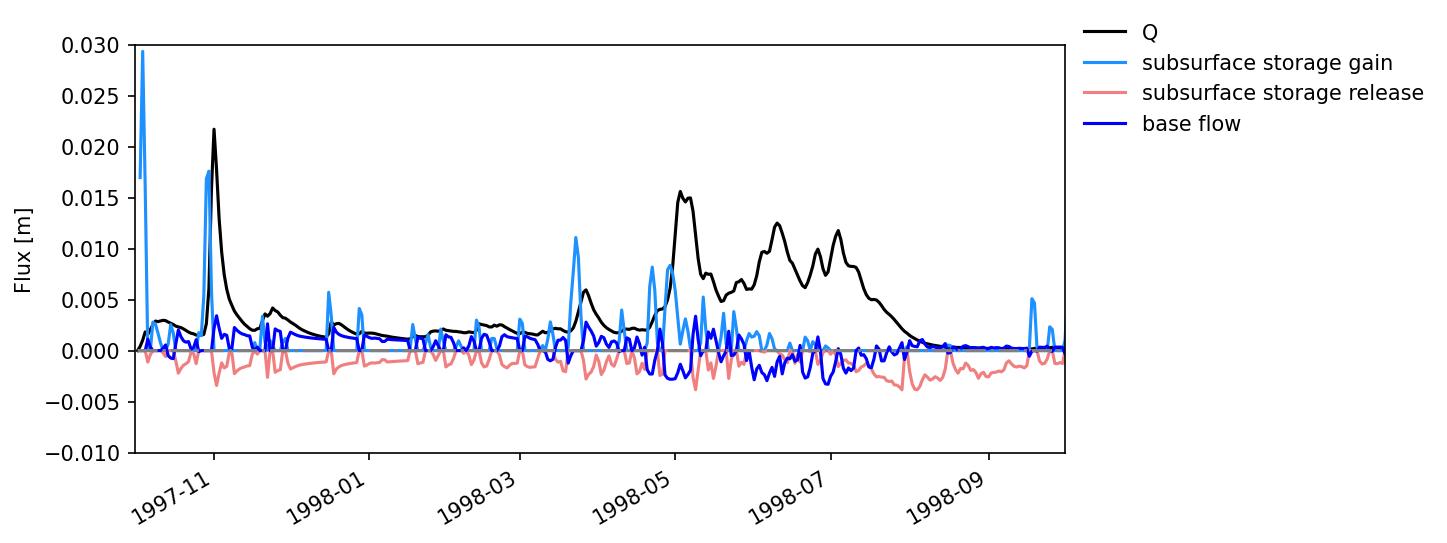

In [62]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

xlim = [datetime(1997,10,1), datetime(1998,10,1)]

# df.plot(y=["cum_rain precipitation [m]", 
#            "cum_snow precipitation [m]"], ax = ax)
# df.plot(y = ["P [m/d]"], style = ['-'], color = [ 'c'], ax = ax, label = ['P'])
# df.plot(y = ['-ET [m/d]'], style = ['-'], color = [ 'crimson'], ax = ax, label = ['ET'])
df.plot(y = ['watershed boundary discharge [m/d]'], style = ['-'], color = [ 'k'], ax = ax, label = ['Q'])
# df.plot(y = ['cum water mass change [m]'], style = ['-'], color = [ 'forestgreen'], ax = ax)

df_subsurface_storage.plot(y = ['storage_gain [m]'], style = ['-'], color = [ 'dodgerblue'], ax = ax, label = ['subsurface storage gain'])
df_subsurface_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'lightcoral'], ax = ax, label = ['subsurface storage release'])
df_subsurface_storage.plot(y = ['base flow [m]'], style = ['-'], color = [ 'blue'], ax = ax, label = ['base flow'])
# df_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'salmon'], ax = ax, label = ['storage release'])
df.plot(y = ['water mass error [m]'], style = ['-.'], color = [ 'grey'], ax = ax, label = [''])
ax.set_ylabel('Flux [m]')
ax.legend(loc='upper left', fontsize = 10, bbox_to_anchor = (1.0,1.1), frameon = False)

ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([-0.01, 0.03])

**plot storage changes**

(-0.05, 0.05)

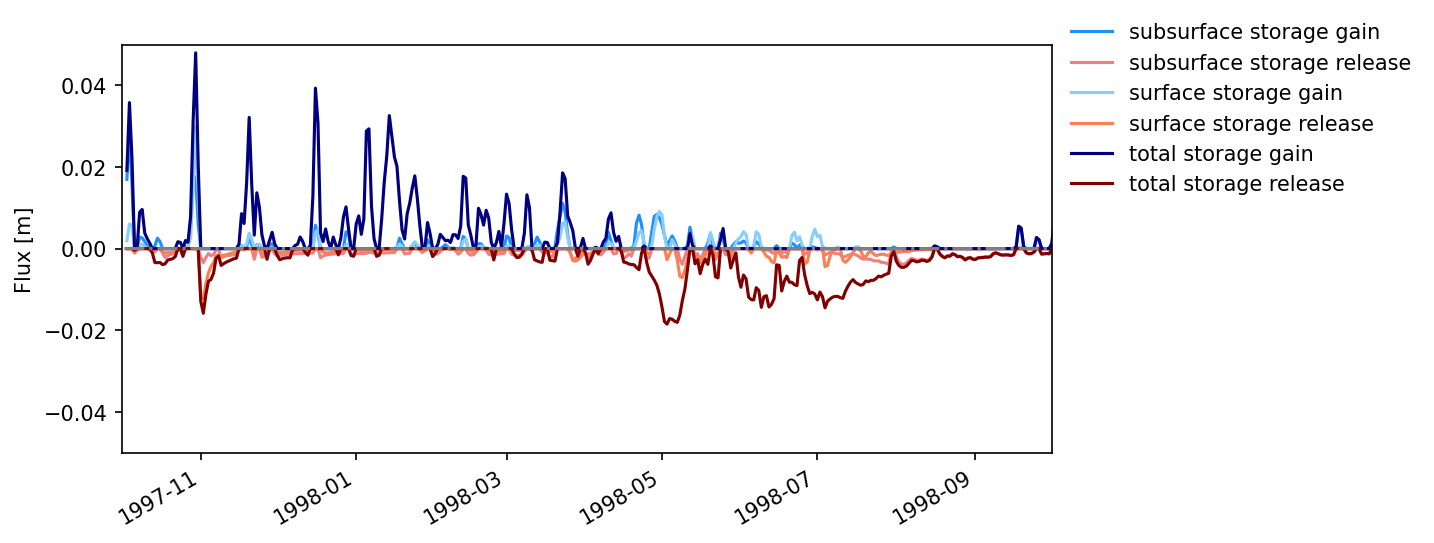

In [46]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

xlim = [datetime(1997,10,1), datetime(1998,10,1)]

df_subsurface_storage.plot(y = ['storage_gain [m]'], style = ['-'], color = [ 'dodgerblue'], ax = ax, label = ['subsurface storage gain'])
df_subsurface_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'lightcoral'], ax = ax, label = ['subsurface storage release'])
df_surface_storage.plot(y = ['storage_gain [m]'], style = ['-'], color = [ 'lightskyblue'], ax = ax, label = ['surface storage gain'])
df_surface_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'coral'], ax = ax, label = ['surface storage release'])
df_total_storage.plot(y = ['storage_gain [m]'], style = ['-'], color = [ 'navy'], ax = ax, label = ['total storage gain'])
df_total_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'maroon'], ax = ax, label = ['total storage release'])
df.plot(y = ['water mass error [m]'], style = ['-.'], color = [ 'grey'], ax = ax, label = [''])
ax.set_ylabel('Flux [m]')
ax.legend(loc='upper left', fontsize = 10, bbox_to_anchor = (1.0,1.1), frameon = False)

ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([-0.05, 0.05])

**plot instantaneous change**

In [86]:
df_total_storage['base flow [m/d]'] = -df_total_storage['storage_lose [m]'] + df['-ET [m/d]'].iloc[1:]
df_total_storage['base flow [m/d]'] = [i if i>0 else 0 for i in df_total_storage['base flow [m/d]']]
df_total_storage['overland flow [m/d]'] = df['watershed boundary discharge [m/d]'].iloc[1:] - df_total_storage['base flow [m/d]']
df_total_storage['overland flow [m/d]'] = [i if i>0 else 0 for i in df_total_storage['overland flow [m/d]']]

(-0.05, 0.05)

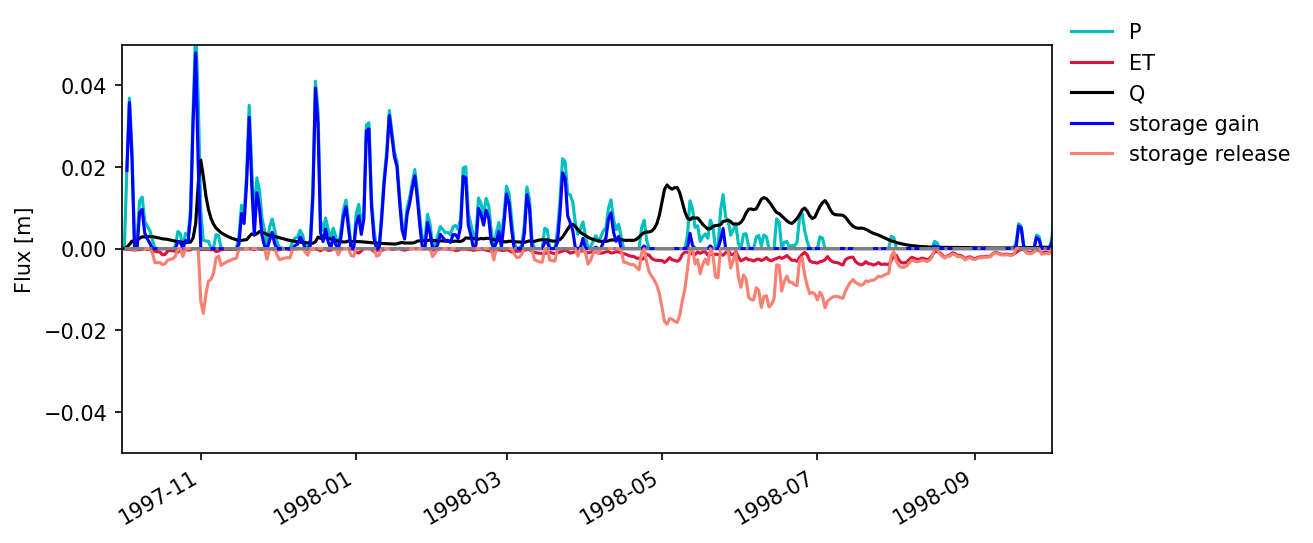

In [67]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

xlim = [datetime(1997,10,1), datetime(1998,10,1)]

# df.plot(y=["cum_rain precipitation [m]", 
#            "cum_snow precipitation [m]"], ax = ax)
df.plot(y = ["P [m/d]"], style = ['-'], color = [ 'c'], ax = ax, label = ['P'])
df.plot(y = ['-ET [m/d]'], style = ['-'], color = [ 'crimson'], ax = ax, label = ['ET'])
df.plot(y = ['watershed boundary discharge [m/d]'], style = ['-'], color = [ 'k'], ax = ax, label = ['Q'])
# df.plot(y = ['cum water mass change [m]'], style = ['-'], color = [ 'forestgreen'], ax = ax)
df_total_storage.plot(y = ['storage_gain [m]'], style = ['-'], color = [ 'blue'], ax = ax, label = ['storage gain'])
df_total_storage.plot(y = ['storage_lose [m]'], style = ['-'], color = [ 'salmon'], ax = ax, label = ['storage release'])
# df_total_storage.plot(y = ['base flow [m/d]'], style = ['-'], color = [ 'gray'], ax = ax, label = ['base flow'])

df.plot(y = ['water mass error [m]'], style = ['-.'], color = [ 'grey'], ax = ax, label = [''])
ax.set_ylabel('Flux [m]')
ax.legend(loc='upper left', fontsize = 10, bbox_to_anchor = (1.0,1.1), frameon = False)

ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([-0.05, 0.05])

Plot flow component

(0.0, 0.015)

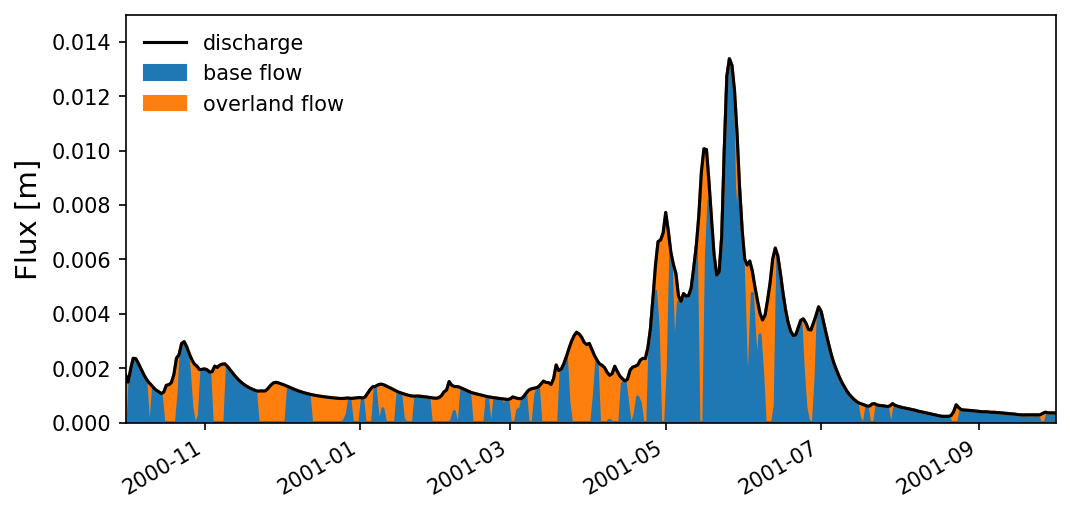

In [97]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

xlim = [datetime(2000,10,1), datetime(2001,10,1)]

df.plot(y = ['watershed boundary discharge [m/d]'], style = ['-'], color = [ 'k'], ax = ax, label = ['discharge'], zorder=99)
df_total_storage.plot.area(y=['base flow [m/d]', 'overland flow [m/d]'], ax=ax, label = ['base flow', 'overland flow'])

ax.set_ylabel('Flux [m]', fontsize=14)
ax.legend(loc='upper left', fontsize = 10, 
          # bbox_to_anchor = (1.0,1.0), 
          frameon = False)

ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([0, 0.015])

**plot cumulative change**

(-2.0, 2.0)

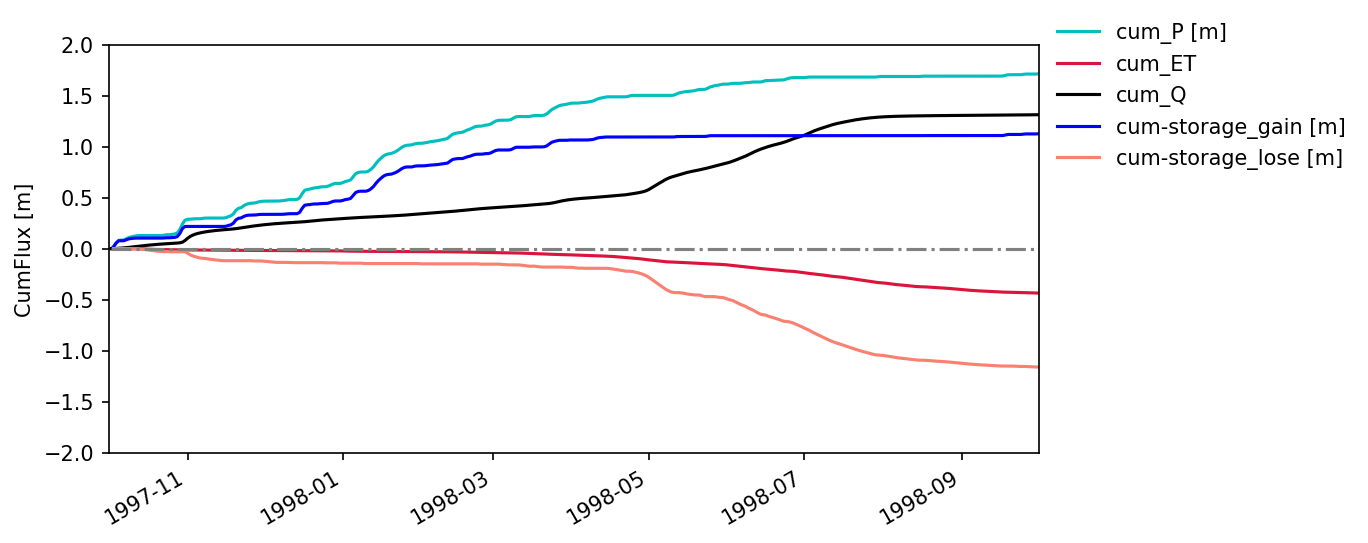

In [64]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

xlim = [datetime(1997,10,1), datetime(1998,10,1)]

# df.plot(y=["cum_rain precipitation [m]", 
#            "cum_snow precipitation [m]"], ax = ax)
df.plot(y = ["cum_P [m]"], style = ['-'], color = [ 'c'], ax = ax)
df.plot(y = ["-cum_ET [m]"], style = ['-'], color = [ 'crimson'], ax = ax, label = ['cum_ET'])
df.plot(y = ["cum_discharge [m]"], style = ['-'], color = [ 'k'], ax = ax, label = ['cum_Q'])
# df.plot(y = ['cum water mass change [m]'], style = ['-'], color = [ 'forestgreen'], ax = ax)
df_total_storage.plot(y = ['cum-storage_gain [m]'], style = ['-'], color = [ 'blue'], ax = ax)
df_total_storage.plot(y = ['cum-storage_lose [m]'], style = ['-'], color = [ 'salmon'], ax = ax)
df.plot(y = ['water mass error [m]'], style = ['-.'], color = [ 'grey'], ax = ax, label = [''])
ax.set_ylabel('CumFlux [m]')
ax.legend(loc='upper left', fontsize = 10, bbox_to_anchor = (1.0,1.1), frameon = False)
# max_error = max(abs(df['water mass error [m]'].max()), abs(df['water mass error [m]'].min()))
#         print(max_error)
# ax.set_title(f'max error = {max_error*1000:.2f} mm')
# ax.xaxis.set_ticklabels([])
# ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(xlim)
ax.set_xlabel('')
ax.set_ylim([-2, 2])

## old vs new ET model

In [68]:
df_base = pd.read_csv(fname_water_balance_base, index_col=0, parse_dates=True)

In [51]:
df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

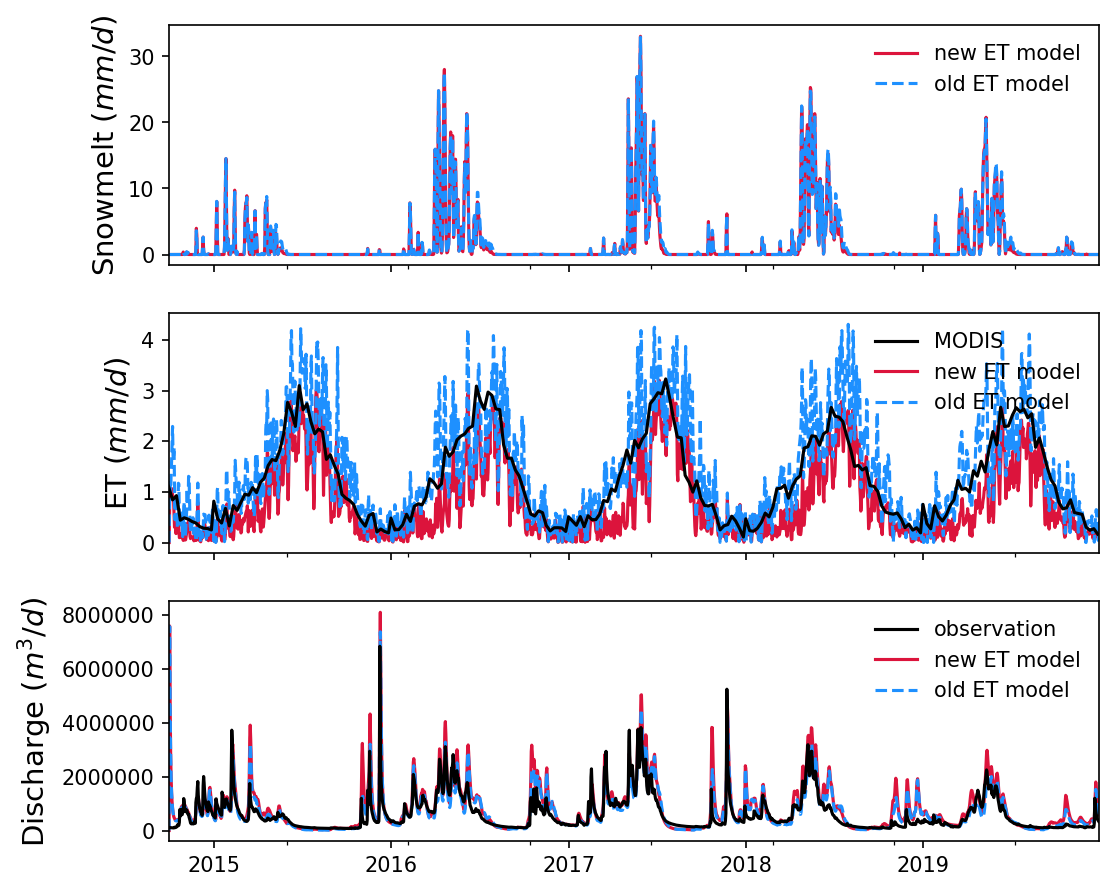

In [57]:
fig, axes = plt.subplots(3,1, figsize=(8,8), sharex = True)
fontsize = 14
xlim = [datetime(2014,10,1), datetime(2019,12,30)]

ax = axes[0]
ax.plot("snowmelt [mm d^-1]", '-', color = 'crimson', data = df, label = 'new ET model')
ax.plot("snowmelt [mm d^-1]", '--', color = 'dodgerblue', data = df_base, label = 'old ET model')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(xlim)
# ax.set_ylim([0,0.05])
ax.set_ylabel('Snowmelt ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[1]
obs_ET_daily_mm.plot(ax=ax, color = 'k',  label = 'MODIS', zorder = 99)
ax.plot()
ax.plot('total evapotranspiration [mm d^-1]', '-', color = 'crimson', data = df, label = 'new ET model')
ax.plot('total evapotranspiration [mm d^-1]', '--', color = 'dodgerblue', data = df_base, label = 'old ET model')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('ET ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[2]
ax.plot('Flow [m^3/day]', data = obs_q, color = 'k', label = 'observation', zorder = 99)
ax.plot("watershed boundary discharge [m^3/d]", '-', color = 'crimson', data = df, label = 'new ET model')
ax.plot("watershed boundary discharge [m^3/d]", '--', color = 'dodgerblue', data = df_base, label = 'old ET model')
# ax.plot( "watershed boundary discharge [m^3/d]", data = df, color = 'crimson')
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simulation')
# df_base.plot(y = "watershed boundary discharge [m^3/d]", color = 'slategray', ax = ax, label = 'simulation (base)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(xlim)
# ax.set_ylim([0, 1e7])
ax.legend(frameon = False)
# plt.xticks(rotation=45)

## old vs new Srad

In [13]:
df = ATSutils.load_waterBalance(work_dir, WB_filename="water_balance-daily.dat",
                                canopy = True, plot = False)
df_base = ATSutils.load_waterBalance(model_dir + "ARW_250m-c128-riverbed/transient-multiple_landcover-1997_2020/", WB_filename="water_balance.dat",
                                canopy = True, plot = False)

In [68]:
# df_base = pd.read_csv(fname_water_balance_base, index_col=0, parse_dates=True)

In [14]:
obs_q = utils.convertUSGSgauge(fname_obs_q, "discharge")
# obs_q.plot(y = 'Flow [m^3/day]')

2021-07-07 09:50:04,123 - root - INFO: insert nan


In [15]:
df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

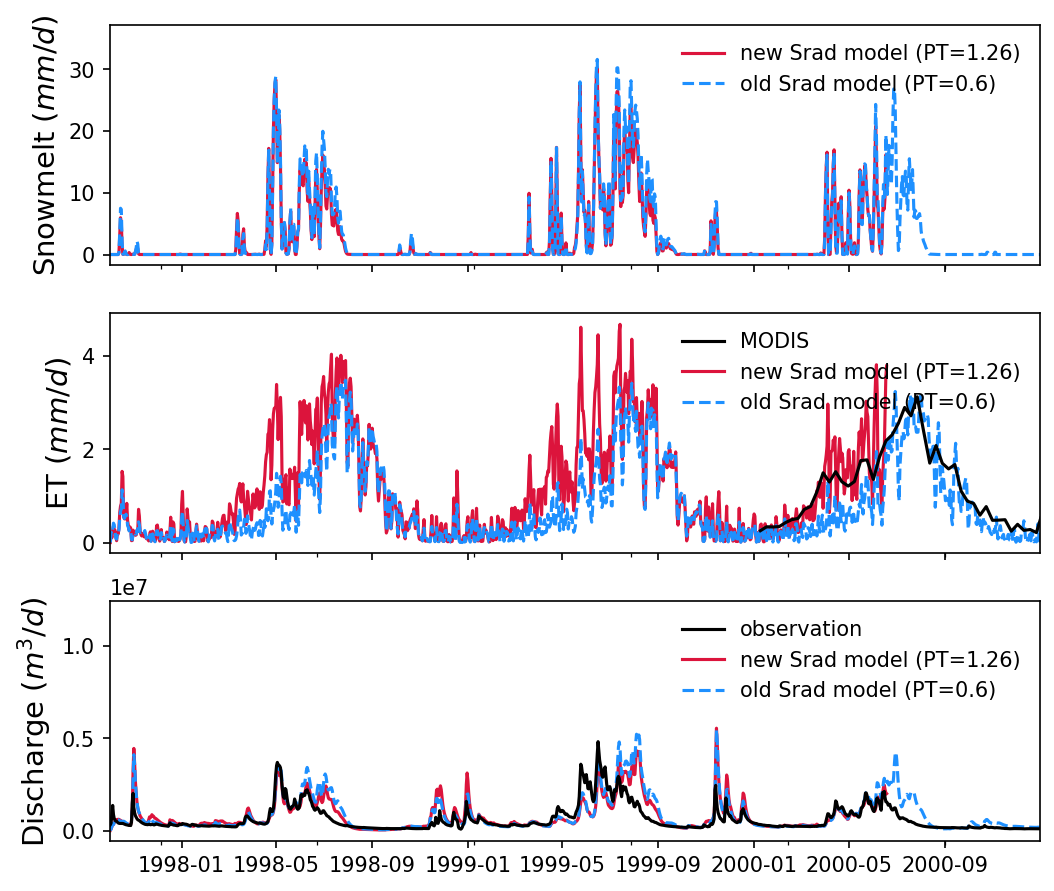

In [17]:
fig, axes = plt.subplots(3,1, figsize=(8,8), sharex = True)
fontsize = 14
xlim = [datetime(1997,10,1), datetime(2000,12,30)]

ax = axes[0]
ax.plot("snowmelt [mm d^-1]", '-', color = 'crimson', data = df, label = 'new Srad model (PT=1.26)')
ax.plot("snowmelt [mm d^-1]", '--', color = 'dodgerblue', data = df_base, label = 'old Srad model (PT=0.6)')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(xlim)
# ax.set_ylim([0,0.05])
ax.set_ylabel('Snowmelt ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[1]
obs_ET_daily_mm.plot(ax=ax, color = 'k',  label = 'MODIS', zorder = 99)
ax.plot()
ax.plot('total evapotranspiration [mm d^-1]', '-', color = 'crimson', data = df, label = 'new Srad model (PT=1.26)')
ax.plot('total evapotranspiration [mm d^-1]', '--', color = 'dodgerblue', data = df_base, label = 'old Srad model (PT=0.6)')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('ET ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[2]
ax.plot('Flow [m^3/day]', data = obs_q, color = 'k', label = 'observation', zorder = 99)
ax.plot("watershed boundary discharge [m^3/d]", '-', color = 'crimson', data = df, label = 'new Srad model (PT=1.26)')
ax.plot("watershed boundary discharge [m^3/d]", '--', color = 'dodgerblue', data = df_base, label = 'old Srad model (PT=0.6)')
# ax.plot( "watershed boundary discharge [m^3/d]", data = df, color = 'crimson')
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simulation')
# df_base.plot(y = "watershed boundary discharge [m^3/d]", color = 'slategray', ax = ax, label = 'simulation (base)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(xlim)
# ax.set_ylim([0, 1e7])
ax.legend(frameon = False)
# plt.xticks(rotation=45)

## riverbed high vs low k

In [30]:
df_base = pd.read_csv(fname_water_balance_base, index_col=0, parse_dates=True)

In [31]:
df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

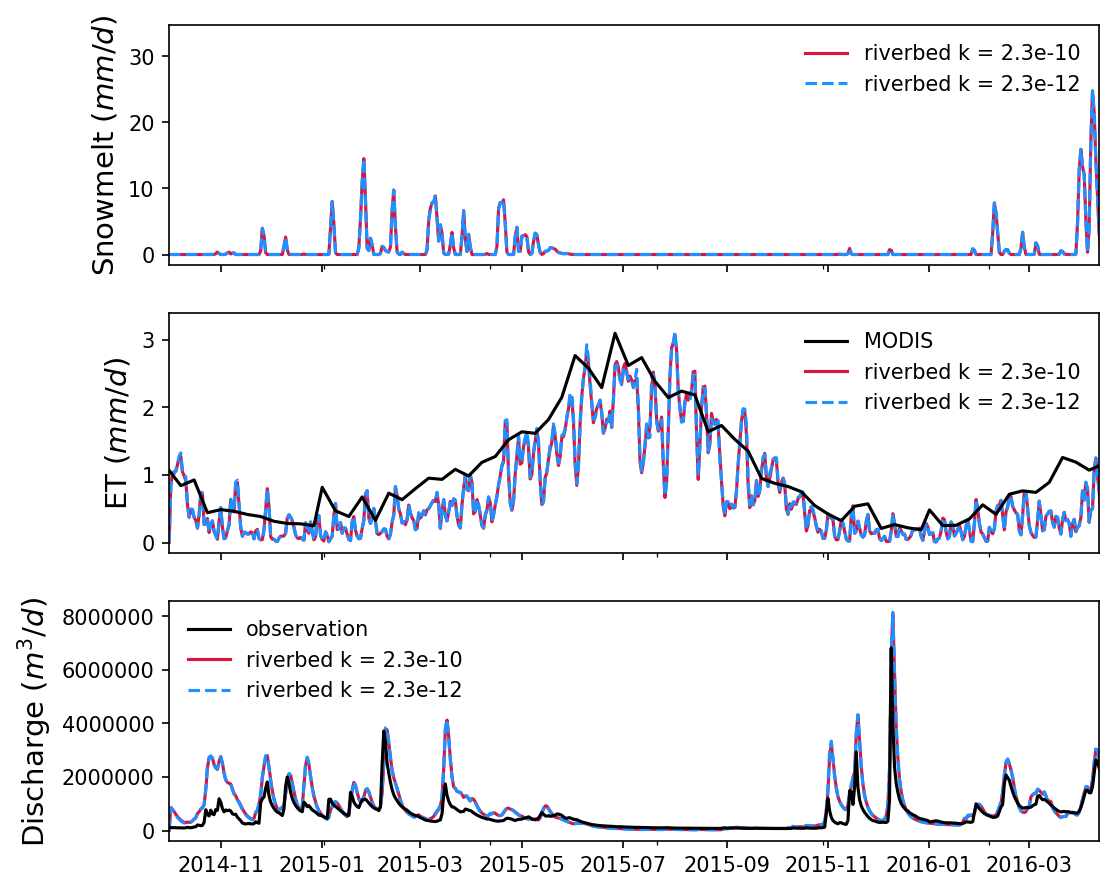

In [32]:
fig, axes = plt.subplots(3,1, figsize=(8,8), sharex = True)
fontsize = 14
# xlim = [datetime(2014,10,1), datetime(2019,12,30)]
xlim = [df_base.index[0], df_base.index[-1]]
labels = ['riverbed k = 2.3e-10', 'riverbed k = 2.3e-12']

ax = axes[0]
ax.plot("snowmelt [mm d^-1]", '-', color = 'crimson', data = df, label = labels[0])
ax.plot("snowmelt [mm d^-1]", '--', color = 'dodgerblue', data = df_base, label = labels[1])
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(xlim)
# ax.set_ylim([0,0.05])
ax.set_ylabel('Snowmelt ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[1]
obs_ET_daily_mm.plot(ax=ax, color = 'k',  label = 'MODIS', zorder = 99)
ax.plot()
ax.plot('total evapotranspiration [mm d^-1]', '-', color = 'crimson', data = df, label = labels[0])
ax.plot('total evapotranspiration [mm d^-1]', '--', color = 'dodgerblue', data = df_base, label = labels[1])
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('ET ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[2]
ax.plot('Flow [m^3/day]', data = obs_q, color = 'k', label = 'observation', zorder = 99)
ax.plot("watershed boundary discharge [m^3/d]", '-', color = 'crimson', data = df, label = labels[0])
ax.plot("watershed boundary discharge [m^3/d]", '--', color = 'dodgerblue', data = df_base, label = labels[1])
# ax.plot( "watershed boundary discharge [m^3/d]", data = df, color = 'crimson')
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simulation')
# df_base.plot(y = "watershed boundary discharge [m^3/d]", color = 'slategray', ax = ax, label = 'simulation (base)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlabel('')
# ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(xlim)
# ax.set_ylim([0, 1e7])
ax.legend(frameon = False)
# plt.xticks(rotation=45)

In [55]:
def varsComp_plot(dfs, variables, labels, colors, linestyles):
    
    nvar = len(variables)
    fig, axes = plt.subplots(nvar,1, figsize=(8,3*nvar), sharex = True)

#     xlim = [dfs[0].index[0], dfs[0].index[-1]]
    for ax, var in zip(axes, variables):
        for i in np.arange(len(dfs)):

            ax.plot(var, linestyles[i], color = colors[i], data = dfs[i], label = labels[i])
            ax.set_ylabel(var)
            ax.set_xlabel('')
            ax.legend(frameon = False)


(735507.0, 736066.0)

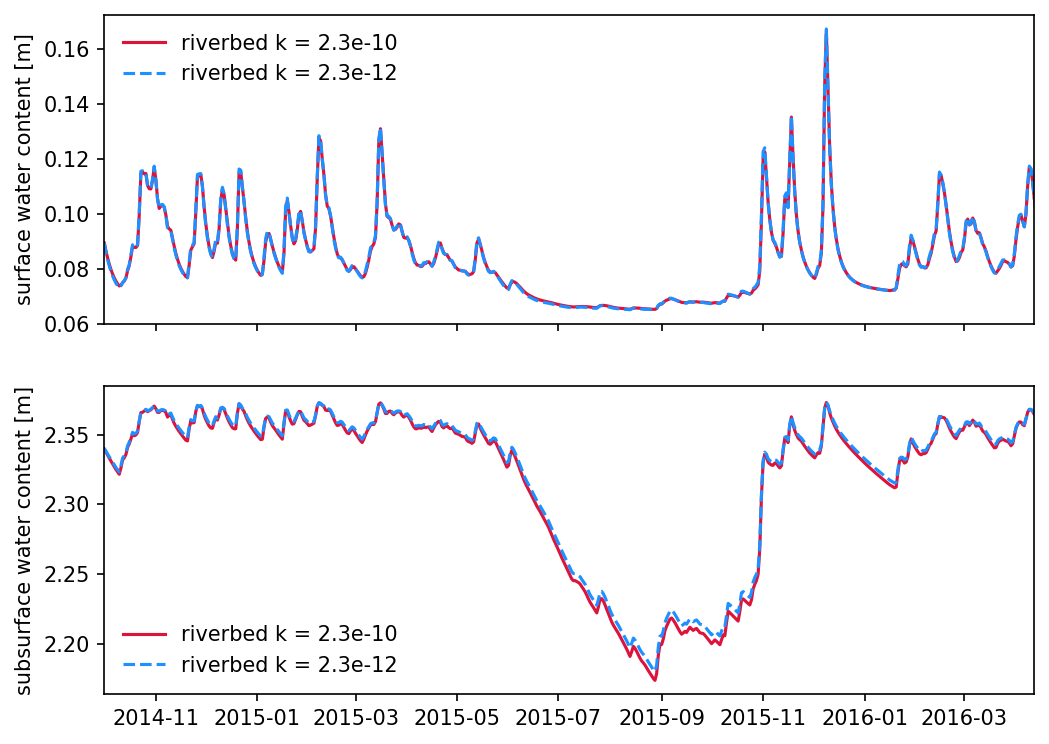

In [56]:
varsComp_plot(dfs = [df, df_base], variables=['surface water content [m]', 'subsurface water content [m]'],
             labels=['riverbed k = 2.3e-10', 'riverbed k = 2.3e-12'], colors=['crimson', 'dodgerblue'], 
              linestyles = ['-', '--'])
plt.xlim([df_base.index[0], df_base.index[-1]])

(735507.0, 736066.0)

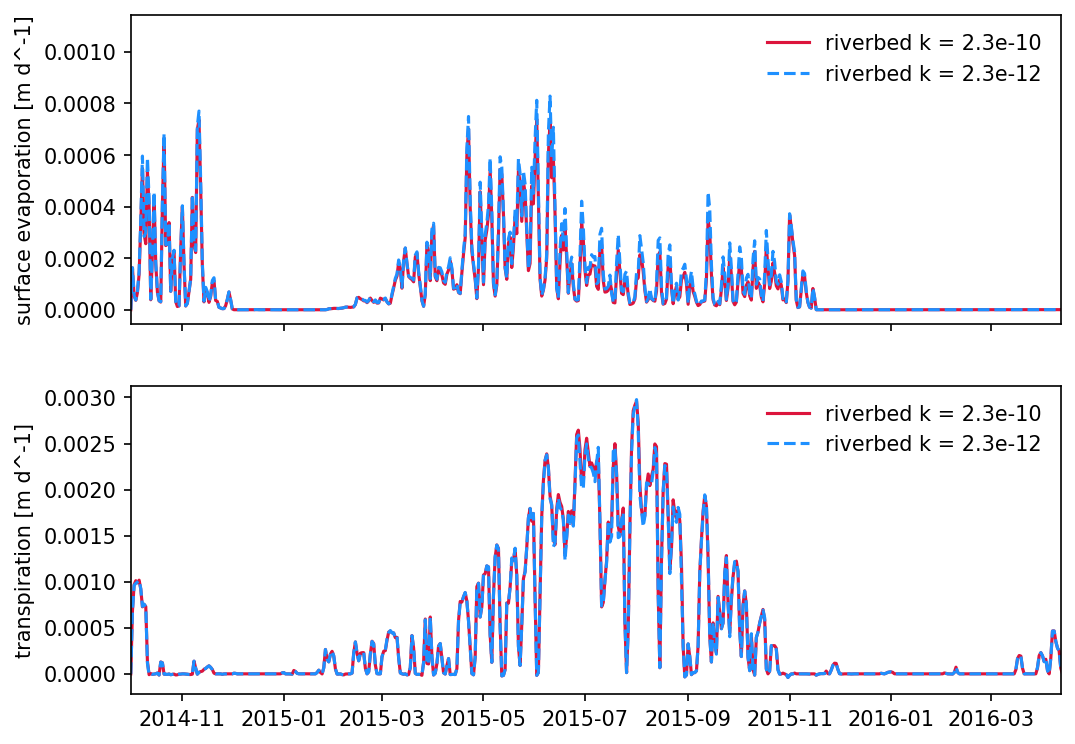

In [58]:
varsComp_plot(dfs = [df, df_base], variables=['surface evaporation [m d^-1]', 'transpiration [m d^-1]'],
             labels=['riverbed k = 2.3e-10', 'riverbed k = 2.3e-12'], colors=['crimson', 'dodgerblue'], 
              linestyles = ['-', '--'])
plt.xlim([df_base.index[0], df_base.index[-1]])

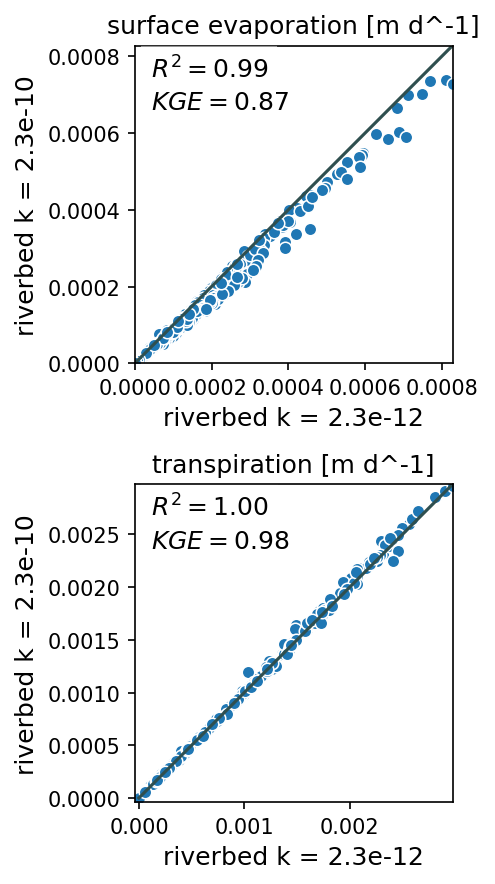

In [61]:
fontsize = 12
fig,axes = plt.subplots(2,1, figsize=(4,6))
ct = 0
for var in ['surface evaporation [m d^-1]', 'transpiration [m d^-1]']:
    ax = axes.flatten()[ct]
    ax.set_aspect('equal')
    metrics = gp.one2one_plot(df_base[var], df[var], 
                   metrics = ["R^2", "KGE"], ax =ax)

    ax.set_ylabel("riverbed k = 2.3e-10", fontsize =fontsize)
    ax.set_xlabel("riverbed k = 2.3e-12", fontsize = fontsize)
    ax.set_title(var)
    ax.set_xlim([df_base[var].min(), df_base[var].max()])
    ax.set_ylim([df_base[var].min(), df_base[var].max()])
    ct +=1
fig.tight_layout()

## old vs new spinup model

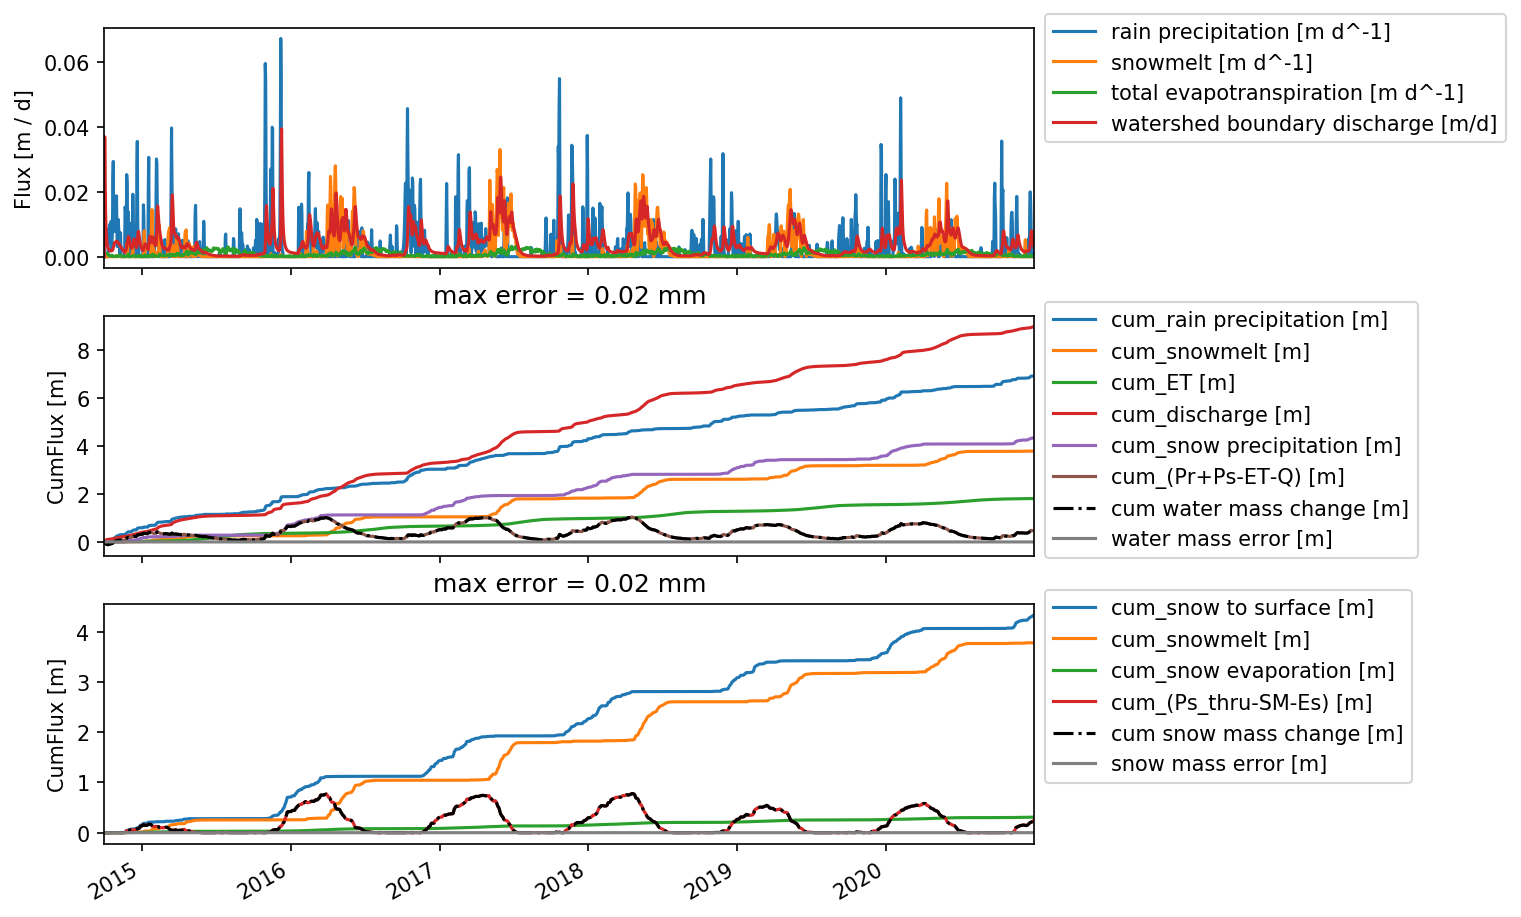

In [27]:
df_base = ATSutils.load_waterBalance(base_dir, canopy=True)

In [21]:
# df_base = pd.read_csv(fname_water_balance_base, index_col=0, parse_dates=True)

In [22]:
df_obs_et = pd.read_csv(fname_MODIS_et, index_col='date', parse_dates= True)
t_diff = (df_obs_et.index[1:] - df_obs_et.index[0:-1]).total_seconds()/86400
obs_ET_daily_mm = df_obs_et.iloc[1:, 0]/t_diff # averaging over 4,5,8 day period
obs_ET_daily_m = obs_ET_daily_mm/1000 # averaging over 4,5,8 day period

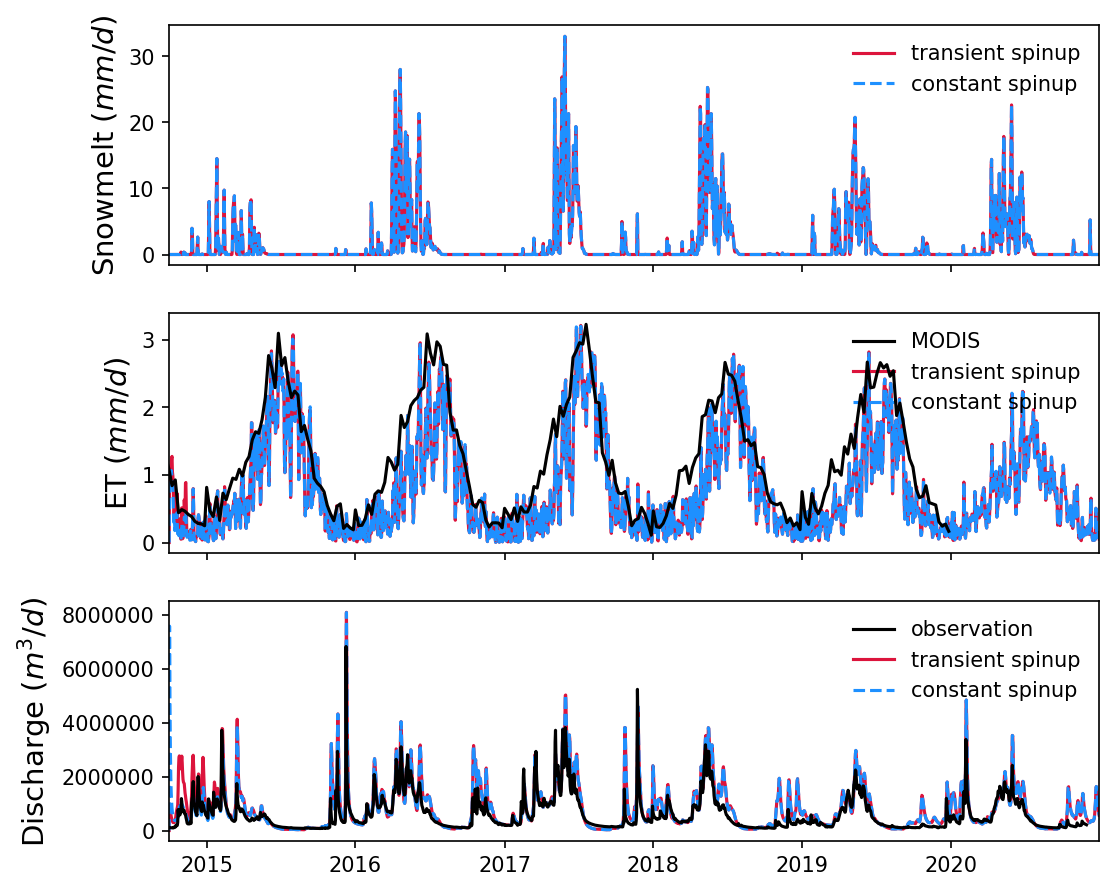

In [28]:
fig, axes = plt.subplots(3,1, figsize=(8,8))
fontsize = 14
# xlim = []

ax = axes[0]
ax.plot("snowmelt [mm d^-1]", '-', color = 'crimson', data = df, label = 'transient spinup')
ax.plot("snowmelt [mm d^-1]", '--', color = 'dodgerblue', data = df_base, label = 'constant spinup')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('Snowmelt ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[1]
obs_ET_daily_mm.plot(ax=ax, color = 'k',  label = 'MODIS', zorder = 99)
ax.plot()
ax.plot('total evapotranspiration [mm d^-1]', '-', color = 'crimson', data = df, label = 'transient spinup')
ax.plot('total evapotranspiration [mm d^-1]', '--', color = 'dodgerblue', data = df_base, label = 'constant spinup')
# df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('ET ($mm/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.xaxis.set_ticklabels([])
ax.legend(frameon = False)

ax = axes[2]
ax.plot('Flow [m^3/day]', data = obs_q, color = 'k', label = 'observation', zorder = 99)
ax.plot("watershed boundary discharge [m^3/d]", '-', color = 'crimson', data = df, label = 'transient spinup')
ax.plot("watershed boundary discharge [m^3/d]", '--', color = 'dodgerblue', data = df_base, label = 'constant spinup')
# ax.plot( "watershed boundary discharge [m^3/d]", data = df, color = 'crimson')
# obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)
# df.plot(y = "watershed boundary discharge [m^3/d]", color = 'c', ax = ax, label = 'simulation')
# df_base.plot(y = "watershed boundary discharge [m^3/d]", color = 'slategray', ax = ax, label = 'simulation (base)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = fontsize)
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0, 1e7])
ax.legend(frameon = False)
# plt.xticks(rotation=45)

### one2one plot

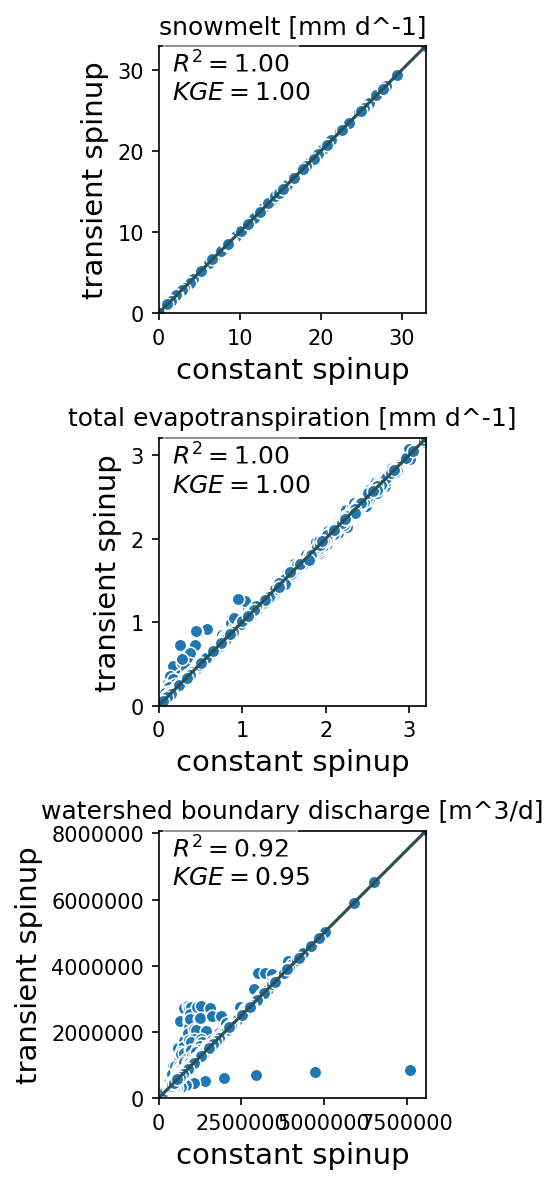

In [31]:
fontsize = 14
fig,axes = plt.subplots(3,1, figsize=(4,8))
ct = 0
for var in ["snowmelt [mm d^-1]","total evapotranspiration [mm d^-1]","watershed boundary discharge [m^3/d]"]:
    ax = axes.flatten()[ct]
    ax.set_aspect('equal')
    metrics = gp.one2one_plot(df_base[var], df[var], 
                   metrics = ["R^2", "KGE"], ax =ax)

    ax.set_ylabel("transient spinup", fontsize =fontsize)
    ax.set_xlabel('constant spinup', fontsize = fontsize)
    ax.set_title(var)
    ax.set_xlim([df_base[var].min(), df_base[var].max()])
    ax.set_ylim([df_base[var].min(), df_base[var].max()])
    ct +=1
fig.tight_layout()

(0.0, 3.2031009269159996)

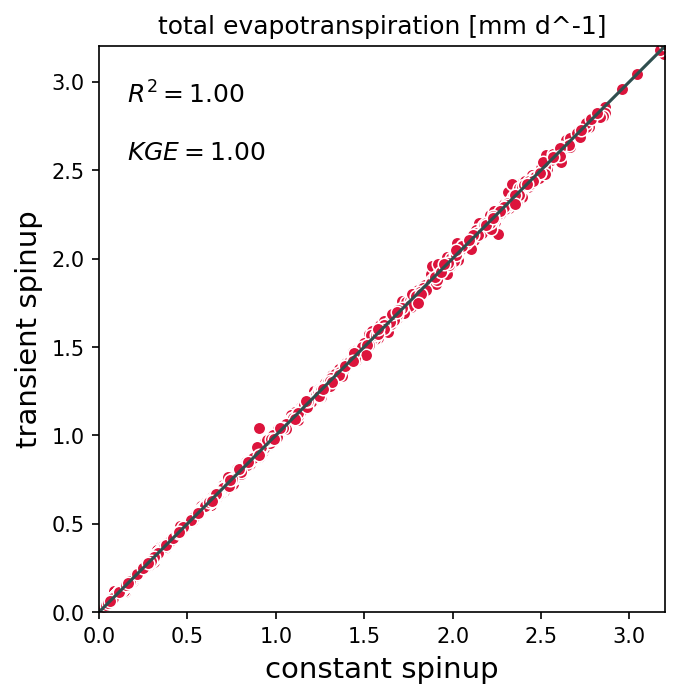

In [33]:
# var= "watershed boundary discharge [m^3/d]"
var = "total evapotranspiration [mm d^-1]"
# period = ['2015-10-01': '2019-10-01']
# ax = axes.flatten()[ct]
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.set_aspect('equal')
metrics = gp.one2one_plot(df_base.loc['2015-10-01': '2020-10-01', var], df.loc['2015-10-01': '2020-10-01',var], 
               metrics = ["R^2", "KGE"], ax =ax, color = 'crimson')

ax.set_ylabel("transient spinup", fontsize =fontsize)
ax.set_xlabel('constant spinup', fontsize = fontsize)
ax.set_title(var)
ax.set_xlim([df_base[var].min(), df_base[var].max()])
ax.set_ylim([df_base[var].min(), df_base[var].max()])

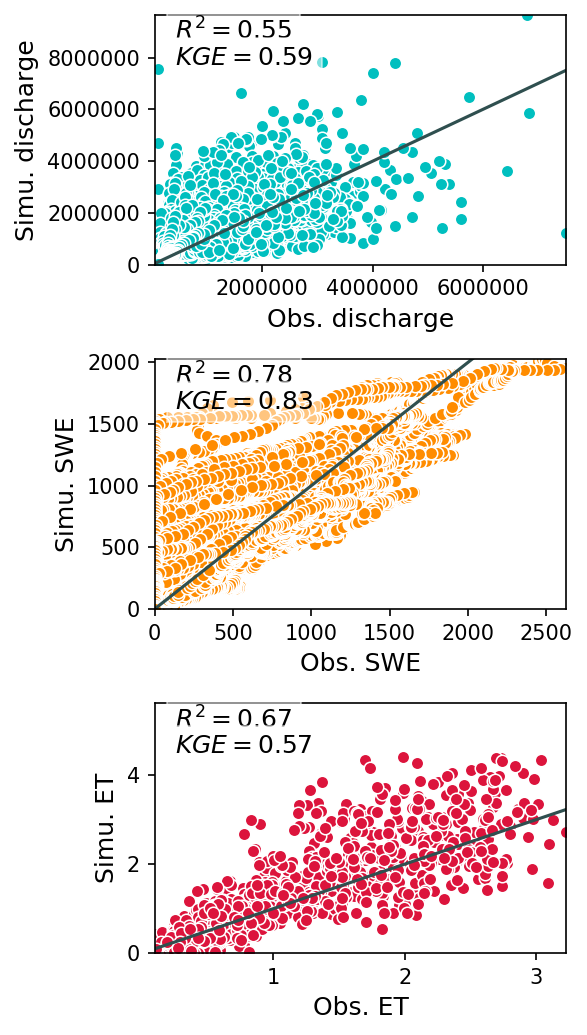

In [104]:
fontsize = 12
fig,axes = plt.subplots(3,1, figsize=(4,7))

ax = axes.flatten()[0]
#     fig,ax = plt.subplots(1,1, figsize=(4,4))
#     ax.set_aspect('equal')  
metrics = gp.one2one_plot( df_base['Flow [m^3/day]'], df["watershed boundary discharge [m^3/d]"], color = 'c',
               metrics = ["R^2", "KGE"], ax =ax)

ax.set_ylabel('Simu. discharge', fontsize =fontsize)
ax.set_xlabel('Obs. discharge', fontsize = fontsize)
ax.set_xlim([obs_q['Flow [m^3/day]'].min(), obs_q['Flow [m^3/day]'].max()])
ax.set_ylim([df["watershed boundary discharge [m^3/d]"].min(), df["watershed boundary discharge [m^3/d]"].max()])

ax = axes.flatten()[1]
#     fig,ax = plt.subplots(1,1, figsize=(4,4))
#     ax.set_aspect('equal')  
metrics = gp.one2one_plot( df_obs_swe["snow_water_equivalent"], df["SWE at SNOTEL [mm]"], color = 'darkorange',
               metrics = ["R^2", "KGE"], ax =ax)

ax.set_ylabel('Simu. SWE', fontsize =fontsize)
ax.set_xlabel('Obs. SWE', fontsize = fontsize)
ax.set_xlim([df_obs_swe["snow_water_equivalent"].min(), df_obs_swe["snow_water_equivalent"].max()])
ax.set_ylim([df["SWE at SNOTEL [mm]"].min(), df["SWE at SNOTEL [mm]"].max()])


ax = axes.flatten()[2]
#     fig,ax = plt.subplots(1,1, figsize=(4,4))
#     ax.set_aspect('equal')  
metrics = gp.one2one_plot( obs_ET_daily_mm, df["total evapotranspiration [mm d^-1]"], color = 'crimson',
               metrics = ["R^2", "KGE"], ax =ax)

ax.set_ylabel('Simu. ET', fontsize =fontsize)
ax.set_xlabel('Obs. ET', fontsize = fontsize)
ax.set_xlim([obs_ET_daily_mm.min(), obs_ET_daily_mm.max()])
ax.set_ylim([df["total evapotranspiration [mm d^-1]"].min(), df["total evapotranspiration [mm d^-1]"].max()])

# ct = 0
# for var in ["watershed boundary discharge [m^3/d]", "snowmelt [m d^-1]", "total evapotranspiration [m d^-1]"]:
#     ax = axes.flatten()[ct]
# #     fig,ax = plt.subplots(1,1, figsize=(4,4))
# #     ax.set_aspect('equal')  
#     metrics = gp.one2one_plot( df_base[var], df[var], 
#                    metrics = ["R^2", "RMSE"], ax =ax)

#     ax.set_ylabel('ATS (riverbed)', fontsize =fontsize)
#     ax.set_xlabel('ATS (base)', fontsize = fontsize)
#     ax.set_xlim([df_base[var].min(), df_base[var].max()])
#     ax.set_ylim([df[var].min(), df[var].max()])
#     ct +=1
fig.tight_layout()

## solute concentration

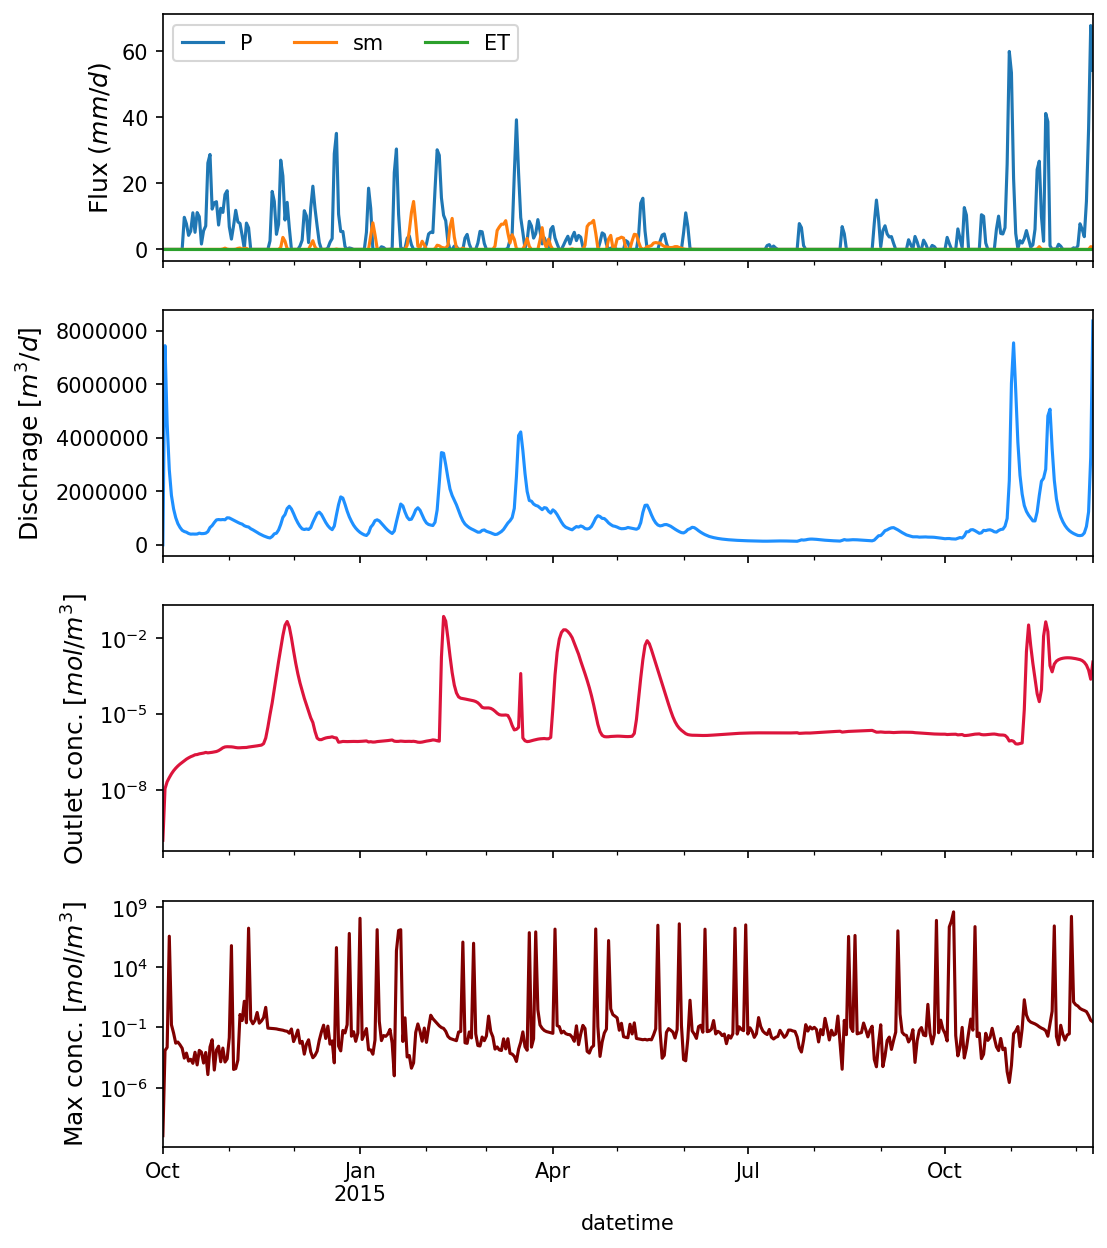

In [113]:
fig, axes = plt.subplots(4,1, figsize=(8,10), sharex=True)
fontsize=12
ax = axes[0]
df.plot(y = ["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], ax = ax)
# ax.plot(["rain precipitation [mm d^-1]", "snowmelt [mm d^-1]", 'total evapotranspiration [mm d^-1]'], 
#         data=df)


# ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0,0.05])
ax.set_ylabel('Flux ($mm/d$)', fontsize = fontsize)
ax.legend(['P','sm','ET'], ncol = 3)

ax = axes[1]
df['watershed boundary discharge [m^3/d]'].plot(ax=ax, color = 'dodgerblue')
# ax.plot('watershed boundary discharge [m^3/d]', 'dodgerblue', data = df)
# plt.ylim([0, 40])
ax.set_xlim(df.index[0], df.index[-1])
ax.set_ylabel('Dischrage [$m^3/d$]', fontsize = fontsize)
ax = axes[2]
df['surface outlet concentration [mol m^-3]'].plot(ax=ax, color = 'crimson')
# ax.plot('surface outlet concentration [mol m^-3]',  'crimson', data = df)
ax.set_ylabel('Outlet conc. [$mol/m^3$]', fontsize = fontsize)
ax.set_xlim(df.index[0], df.index[-1])
plt.xlabel('')
ax.set_yscale('log')
# plt.ylim([0, 1e7])
# plt.yscale('log')

ax = axes[3]
df['max surface outlet concentration [mol m^-3]'].plot(ax=ax, color = 'maroon')
# df['surface outlet concentration [mol m^-3]'].plot()
plt.ylabel('Max conc. [$mol/m^3$]', fontsize = fontsize)
plt.yscale('log')

## Sensitivity analysis

### Air-snow temp diff

In [12]:
df1 = utils.load_waterBalance(work_dir_Tdiff1C)
df2 = utils.load_waterBalance(work_dir_Tdiff2C)

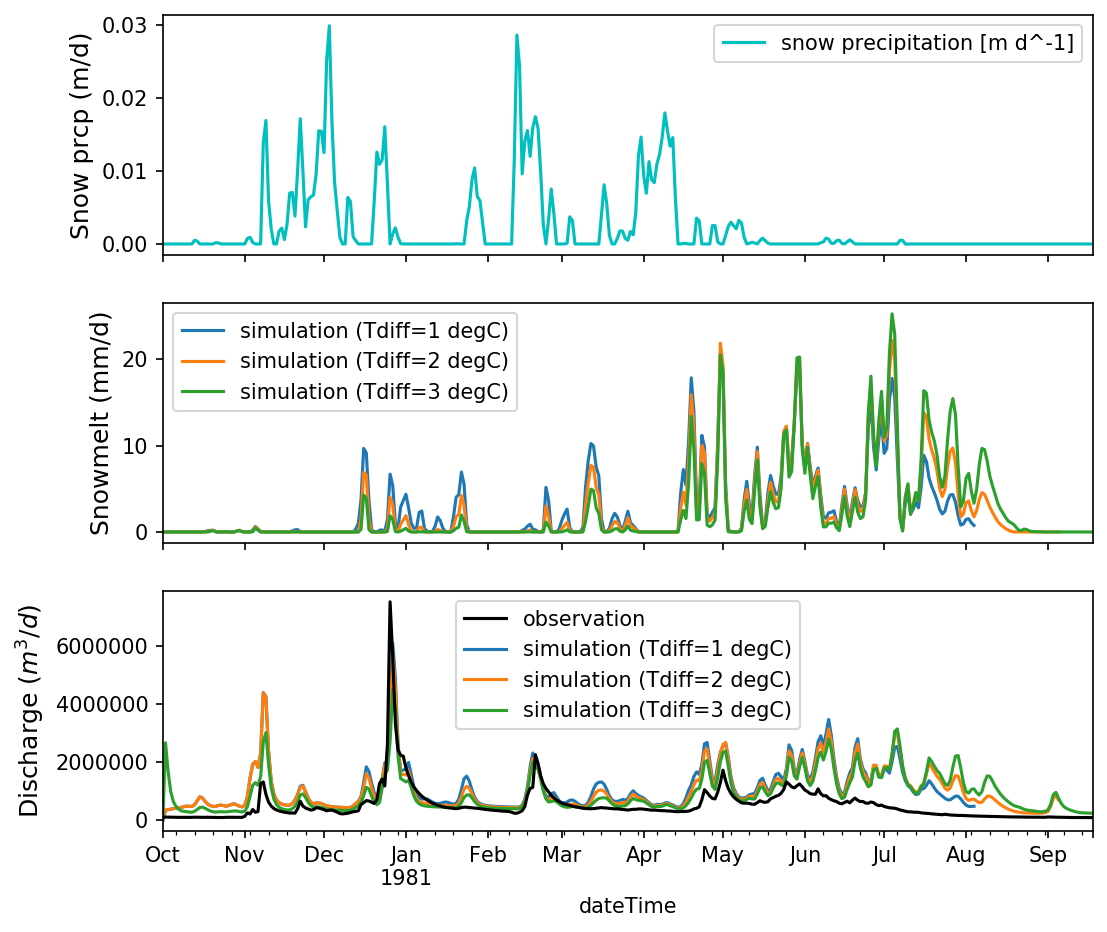

In [23]:
fig, axes = plt.subplots(3,1, figsize=(8,8))

ax = axes[0]
df.plot(y = "snow precipitation [m d^-1]", color = "c", ax = ax)
# df1.plot(y = "snow precipitation [m d^-1]", ax = ax, label = 'simulation (Tdiff=1 degC)')
ax.set_ylabel("Snow prcp (m/d)", fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
ax.xaxis.set_ticklabels([])

ax = axes[1]

df1.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (Tdiff=1 degC)')
df2.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (Tdiff=2 degC)')
df.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (Tdiff=3 degC)')
ax.set_ylabel("Snowmelt (mm/d)", fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
ax.xaxis.set_ticklabels([])

ax = axes[2]
obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)

df1.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (Tdiff=1 degC)')
df2.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (Tdiff=2 degC)')
df.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (Tdiff=3 degC)')

ax.set_ylabel('Discharge ($m^3/d$)', fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0, 2e6])
ax.legend()
# plt.xticks(rotation=45)

### snow melt rate

In [24]:
df1 = utils.load_waterBalance(work_dir_meltRatex2)
df2 = utils.load_waterBalance(work_dir_meltRatex4)

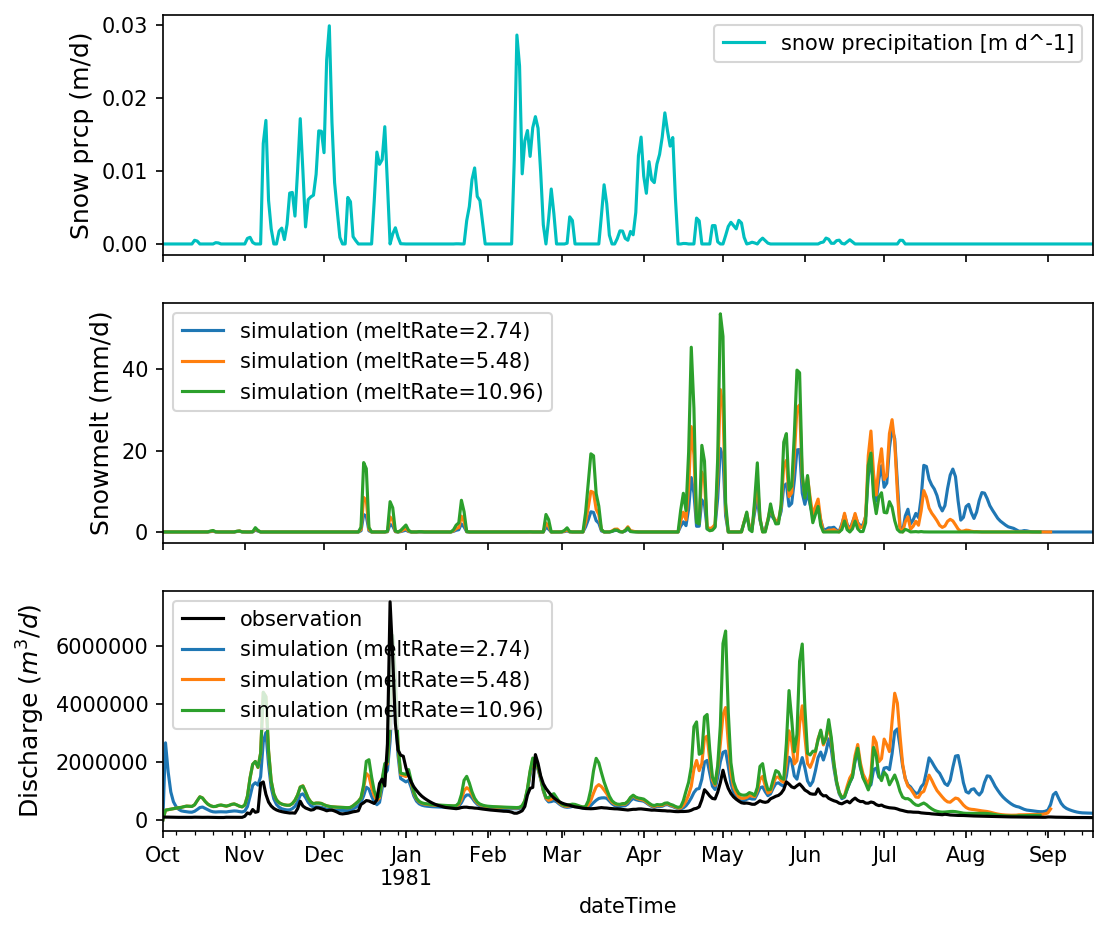

In [27]:
fig, axes = plt.subplots(3,1, figsize=(8,8))

ax = axes[0]
df.plot(y = "snow precipitation [m d^-1]", color = "c", ax = ax)
# df1.plot(y = "snow precipitation [m d^-1]", ax = ax, label = 'simulation (Tdiff=1 degC)')
ax.set_ylabel("Snow prcp (m/d)", fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
ax.xaxis.set_ticklabels([])

ax = axes[1]

df.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (meltRate=2.74)')
df1.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (meltRate=5.48)')
df2.plot(y = "snowmelt [mm d^-1]", ax = ax, label = 'simulation (meltRate=10.96)')

ax.set_ylabel("Snowmelt (mm/d)", fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
ax.xaxis.set_ticklabels([])

ax = axes[2]
obs_q.plot( y='Flow [m^3/day]', color = 'k', ax = ax, label = 'observation', zorder = 99)

df.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (meltRate=2.74)')
df1.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (meltRate=5.48)')
df2.plot(y = "watershed boundary discharge [m^3/d]", ax = ax, label = 'simulation (meltRate=10.96)')


ax.set_ylabel('Discharge ($m^3/d$)', fontsize = 12)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_ylim([0, 2e6])
ax.legend()
# plt.xticks(rotation=45)